In [1]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu

# Project level imports
from larval_gonad.notebook import Nb
from larval_gonad.plotting import figure_element
from larval_gonad.scRNAseq import Seurat, norm_data
from larval_gonad.x_to_a import (CHROMS_CHR, MAJOR_ARMS_CHR, agg_all, x_to_a, 
                                 mann_whitney_by_arm, fe_chrom_boxplot, commonly_expressed,
                                )
from larval_gonad.scRNAseq import seurat_or_data

In [2]:
# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../scrnaseq-wf/data/scrnaseq_combine_force')

last updated: 2018-06-14 
Git hash: a13f026202414f0e2c8bdd27d91b7b26f26234f5


## All Genes

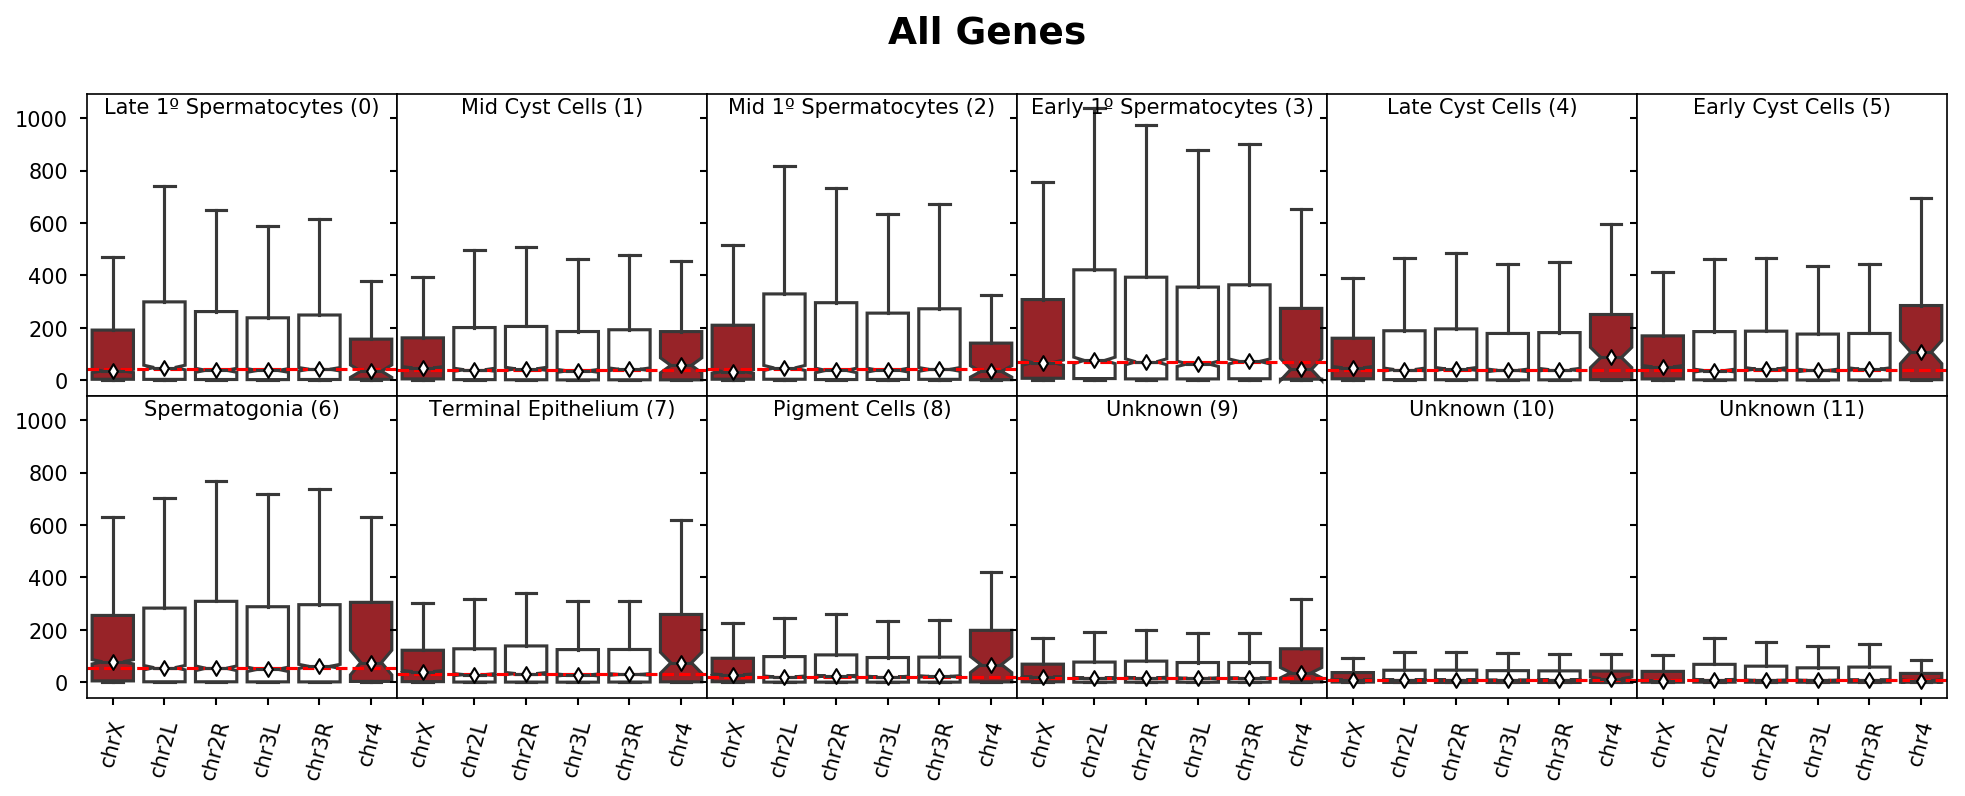

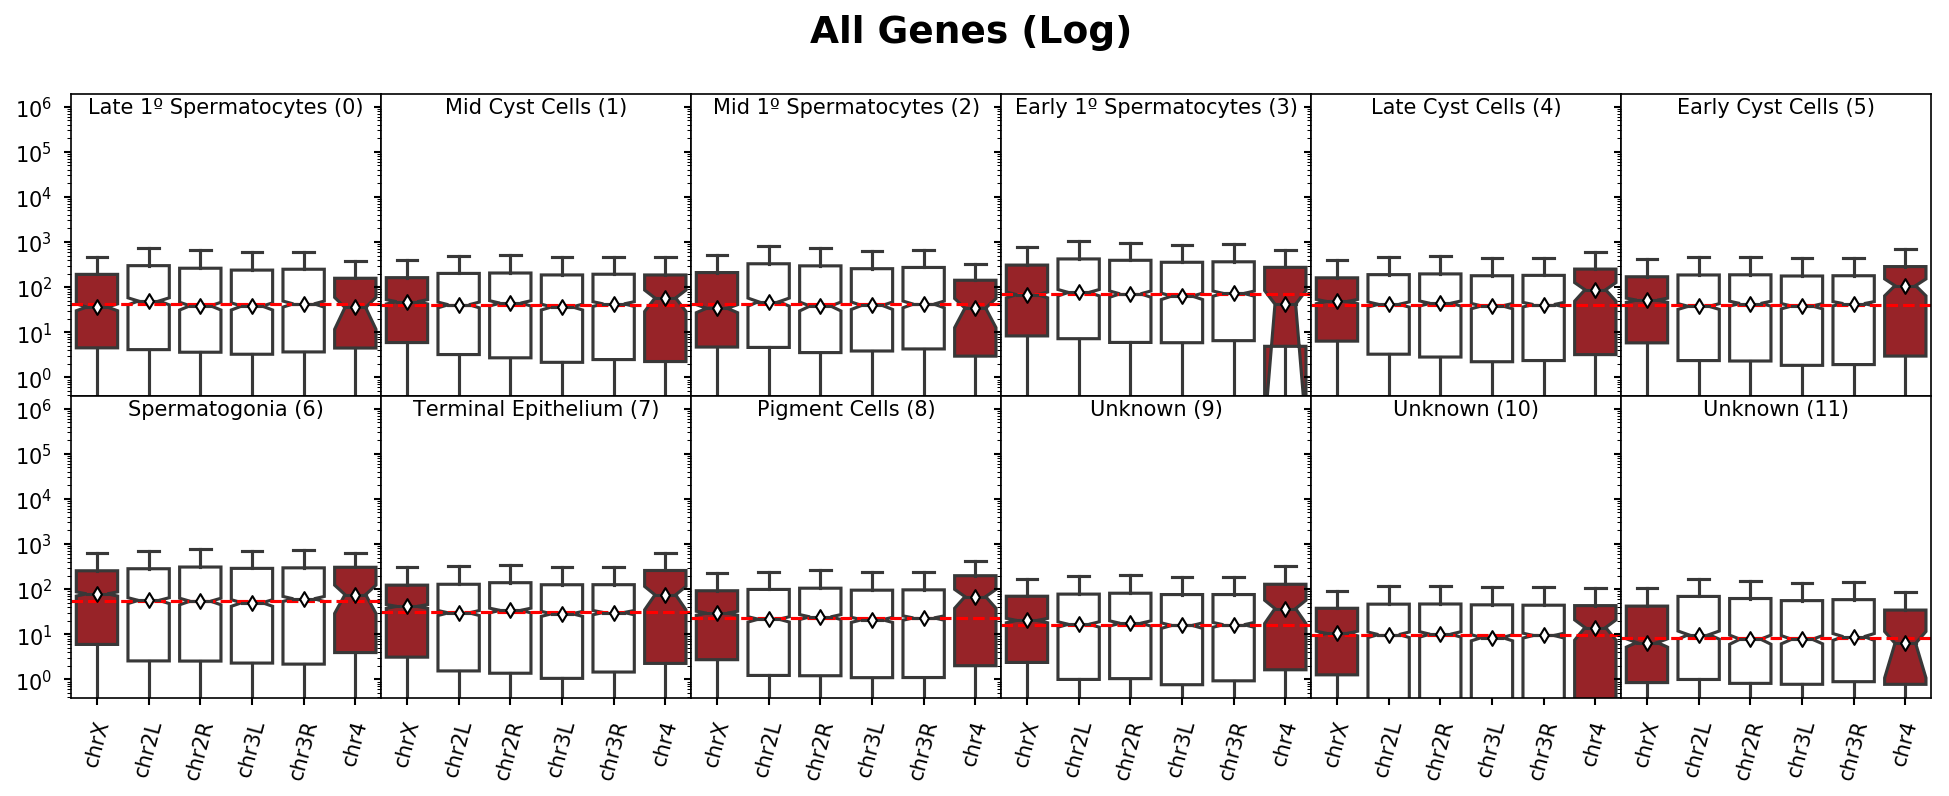

In [3]:
fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom)
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('All Genes')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('All Genes (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [4]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.862622  1.162035  0.811616  0.960711  1.168973  1.263886  1.409095   
chr2L  1.171966  0.994420  1.134482  1.077497  1.010026  0.923501  1.008577   
chr2R  0.919907  1.078545  0.911268  1.002656  1.062474  1.065056  0.967280   
chr3L  0.904649  0.891700  0.938979  0.893377  0.930978  0.936187  0.896356   
chr3R  1.013121  1.037584  1.001649  1.023237  0.999313  1.058876  1.095130   
chr4   0.842567  1.402674  0.818363  0.592302  2.122269  2.649561  1.357780   

             7         8         9         10        11  
chrom                                                    
chrX   1.355783  1.305682  1.231848  1.111220  0.785242  
chr2L  0.974505  0.958979  1.011660  1.045591  1.171443  
chr2R  1.106316  1.079610  1.065633  1.065968  0.931840  
chr3L  0.931796  0.934722  0.954651  0.899199  0.925791  
chr3R  0.991949  1.024234  0.990405  0.998758  1.058238  
chr4   2.441758  3.032488  2.251534  1.499368  0.753319

In [5]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.998841  0.841730  0.512646
3        0.072126  0.156652  0.947662
2        0.000699  0.061560  0.985702
0        0.023244  0.117275  0.972880

In [6]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.971933  0.557068  0.334480
3        0.082662  0.055205  0.813033
2        0.006091  0.026657  0.936874
0        0.059550  0.038095  0.917469

Text(0.5,0.98,'All Genes (Log)')

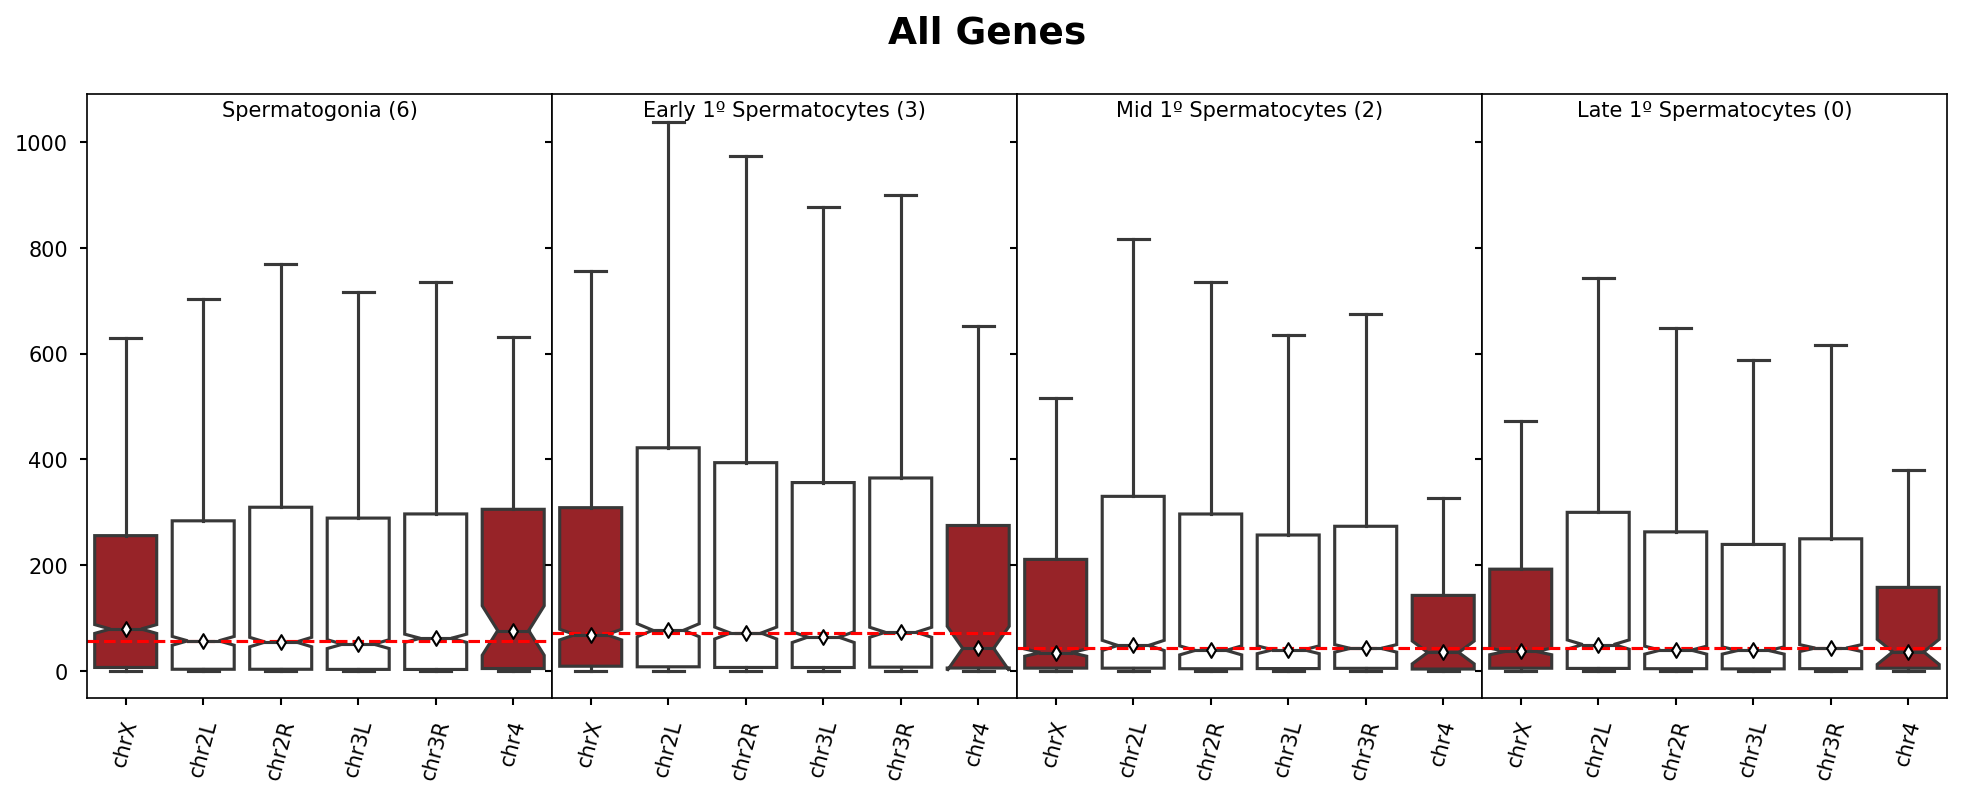

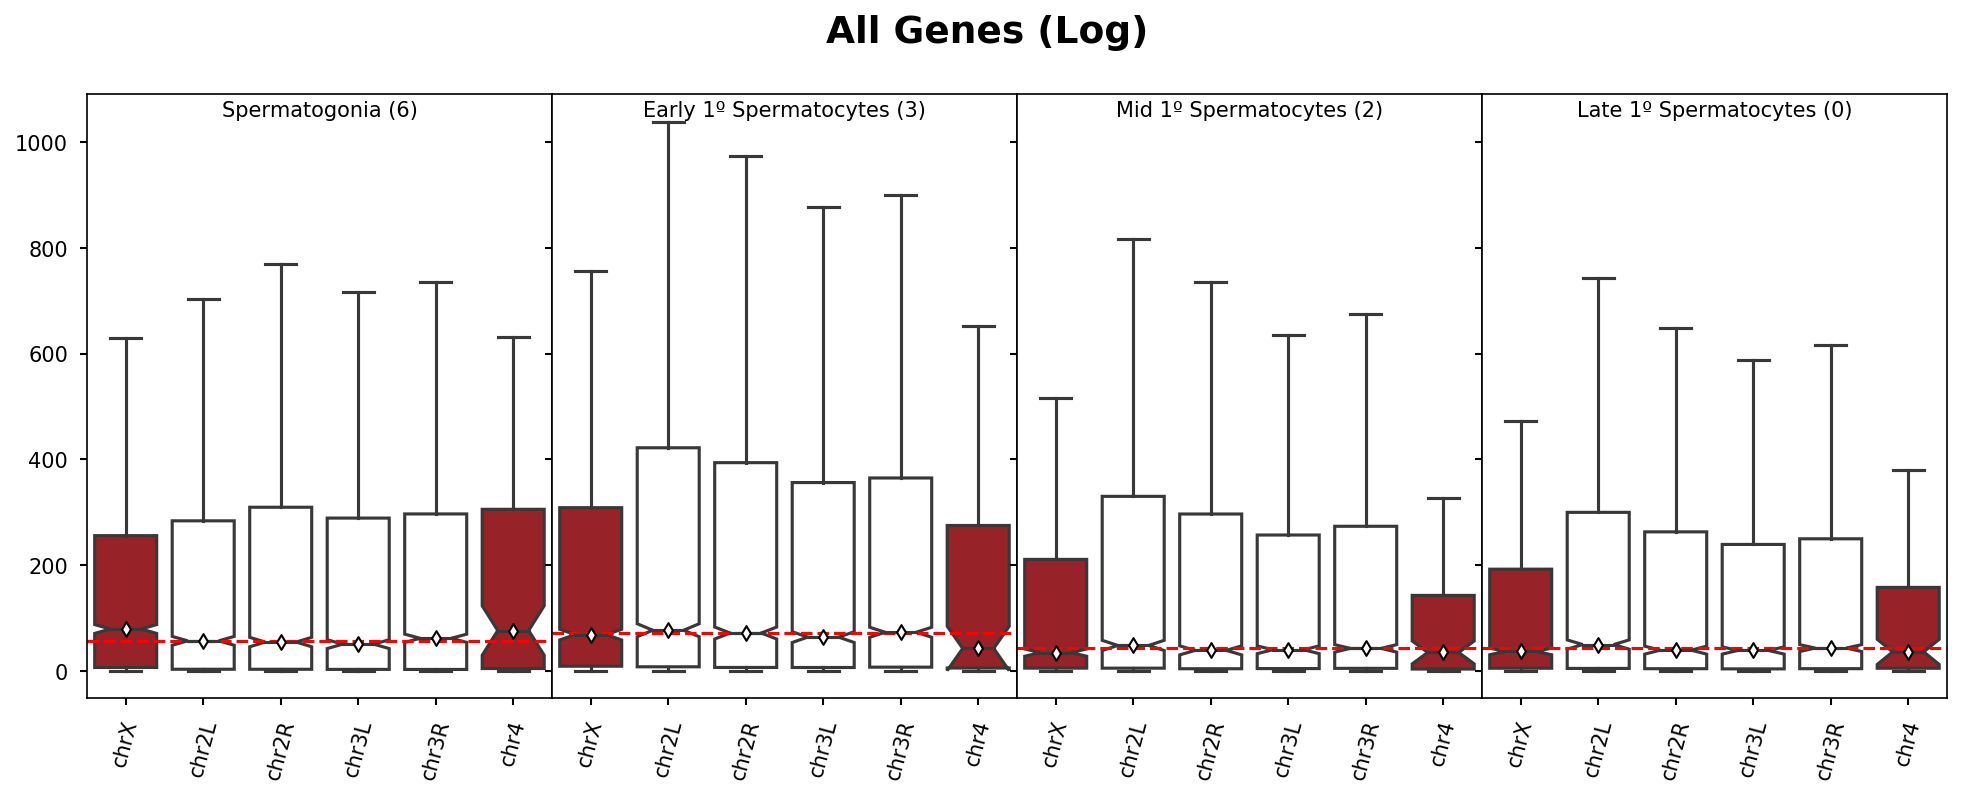

In [7]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom)
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('All Genes')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('All Genes (Log)')

## Commonly Expressed

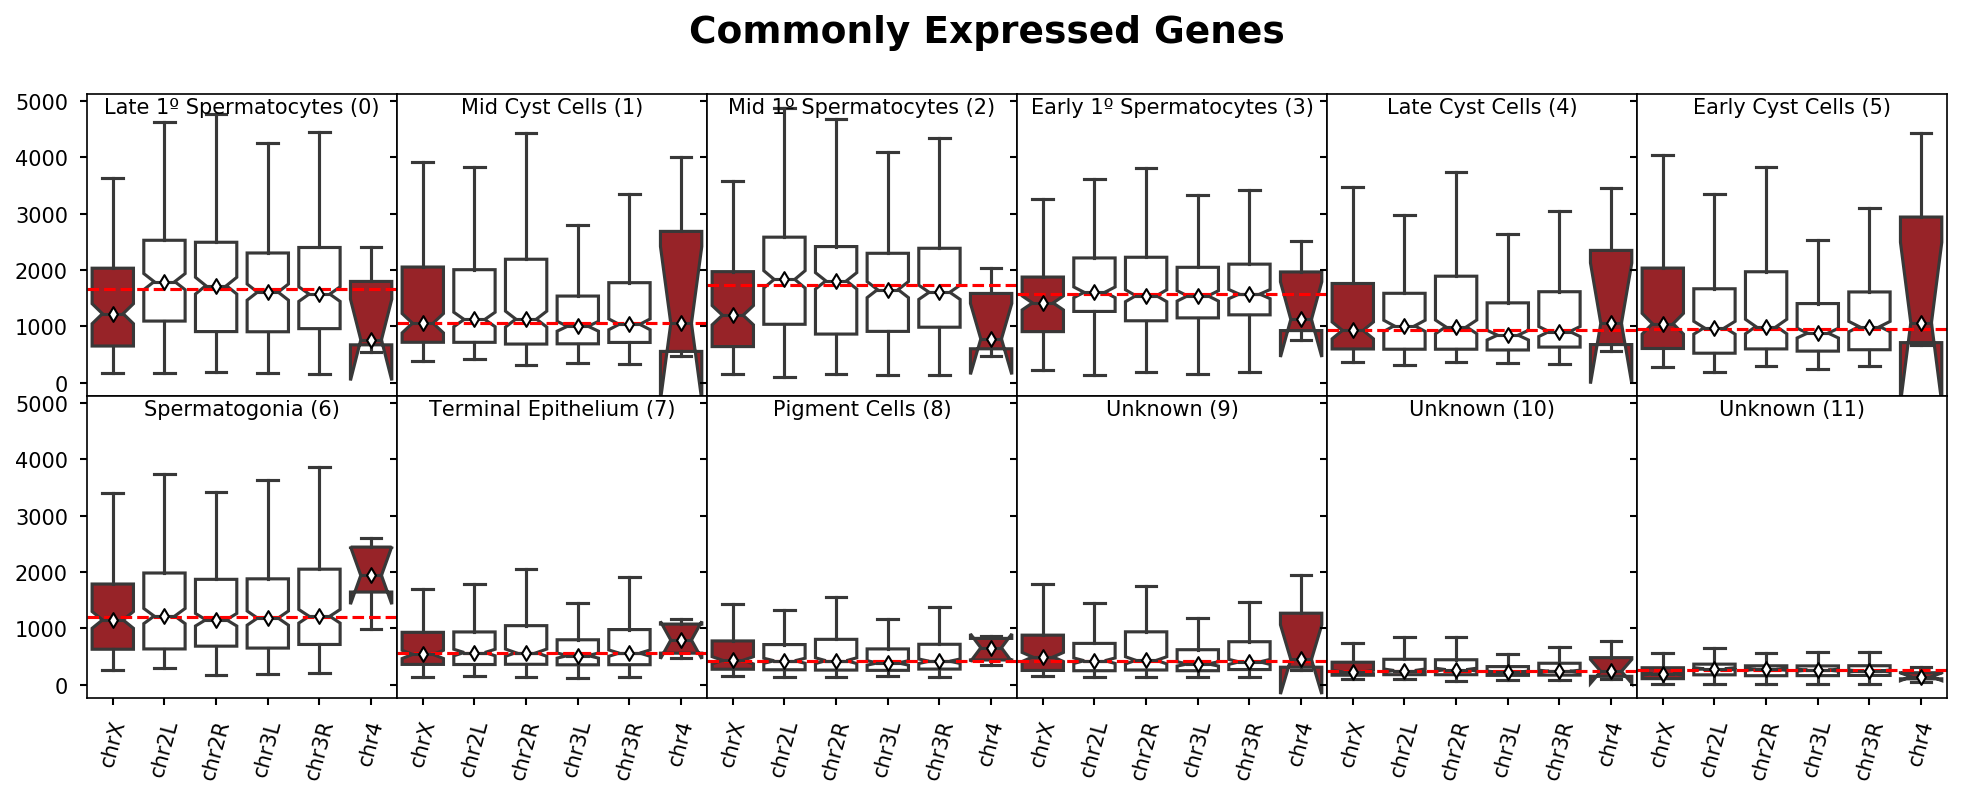

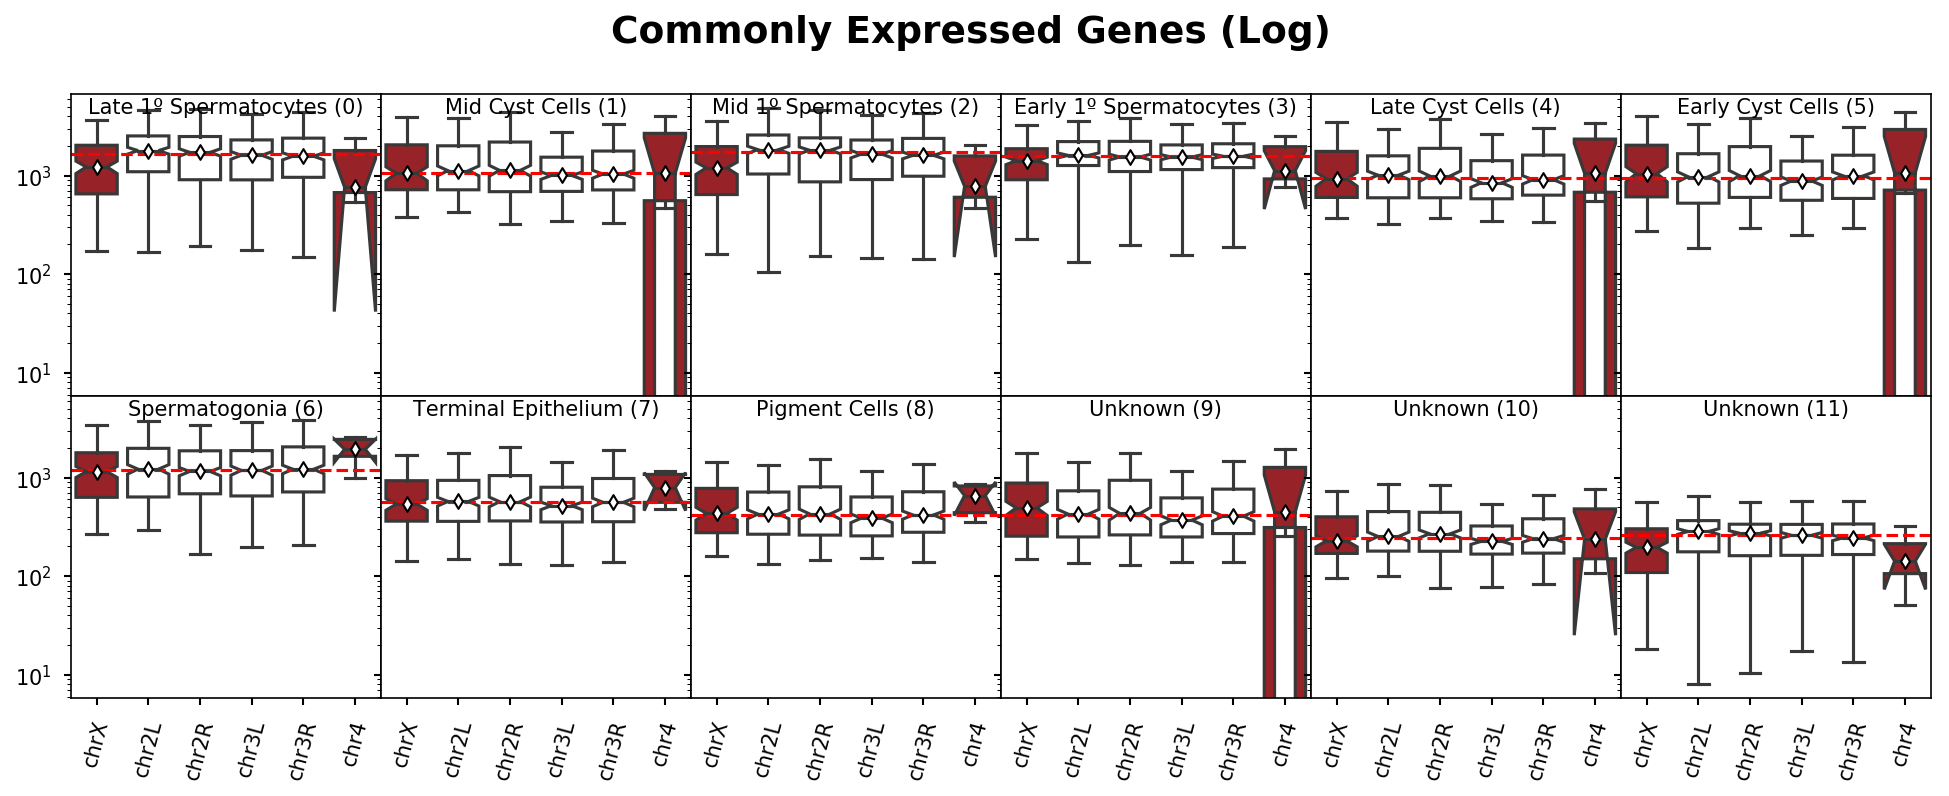

In [8]:
# Create list of commonly expressed genes
target_genes = commonly_expressed(seurat_dir=nbconfig.seurat_dir)

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[target_genes]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('Commonly Expressed Genes')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('Commonly Expressed Genes (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [9]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.737331  0.994053  0.690631  0.904555  0.993597  1.098622  0.959964   
chr2L  1.079565  1.056577  1.056890  1.024681  1.080312  1.024108  1.017361   
chr2R  1.036614  1.062651  1.041824  0.986026  1.060522  1.046178  0.962788   
chr3L  0.967756  0.942978  0.952201  0.984189  0.903583  0.924075  0.987214   
chr3R  0.946590  0.975266  0.924880  1.004380  0.971905  1.044827  1.013925   
chr4   0.458727  0.991193  0.448209  0.717607  1.128420  1.116301  1.618686   

             7         8         9         10        11  
chrom                                                    
chrX   0.959143  1.040113  1.180873  0.943909  0.747187  
chr2L  1.018907  1.020233  1.022693  1.048122  1.082104  
chr2R  1.013446  1.023860  1.039185  1.115812  1.038639  
chr3L  0.921980  0.928169  0.886656  0.935409  0.990685  
chr3R  0.999863  1.000000  0.972484  0.994447  0.932731  
chr4   1.411172  1.572058  1.075488  0.985049  0.542262

In [10]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.208308  0.968762  0.403377
3        0.000438  0.152347  0.866745
2        0.000004  0.040714  0.904383
0        0.000047  0.079821  0.912070

In [11]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.514479  0.851023  0.545643
3        0.052168  0.189239  0.674049
2        0.004768  0.114883  0.760336
0        0.018949  0.189239  0.758190

Text(0.5,0.98,'Commonly Expressed Genes (Log)')

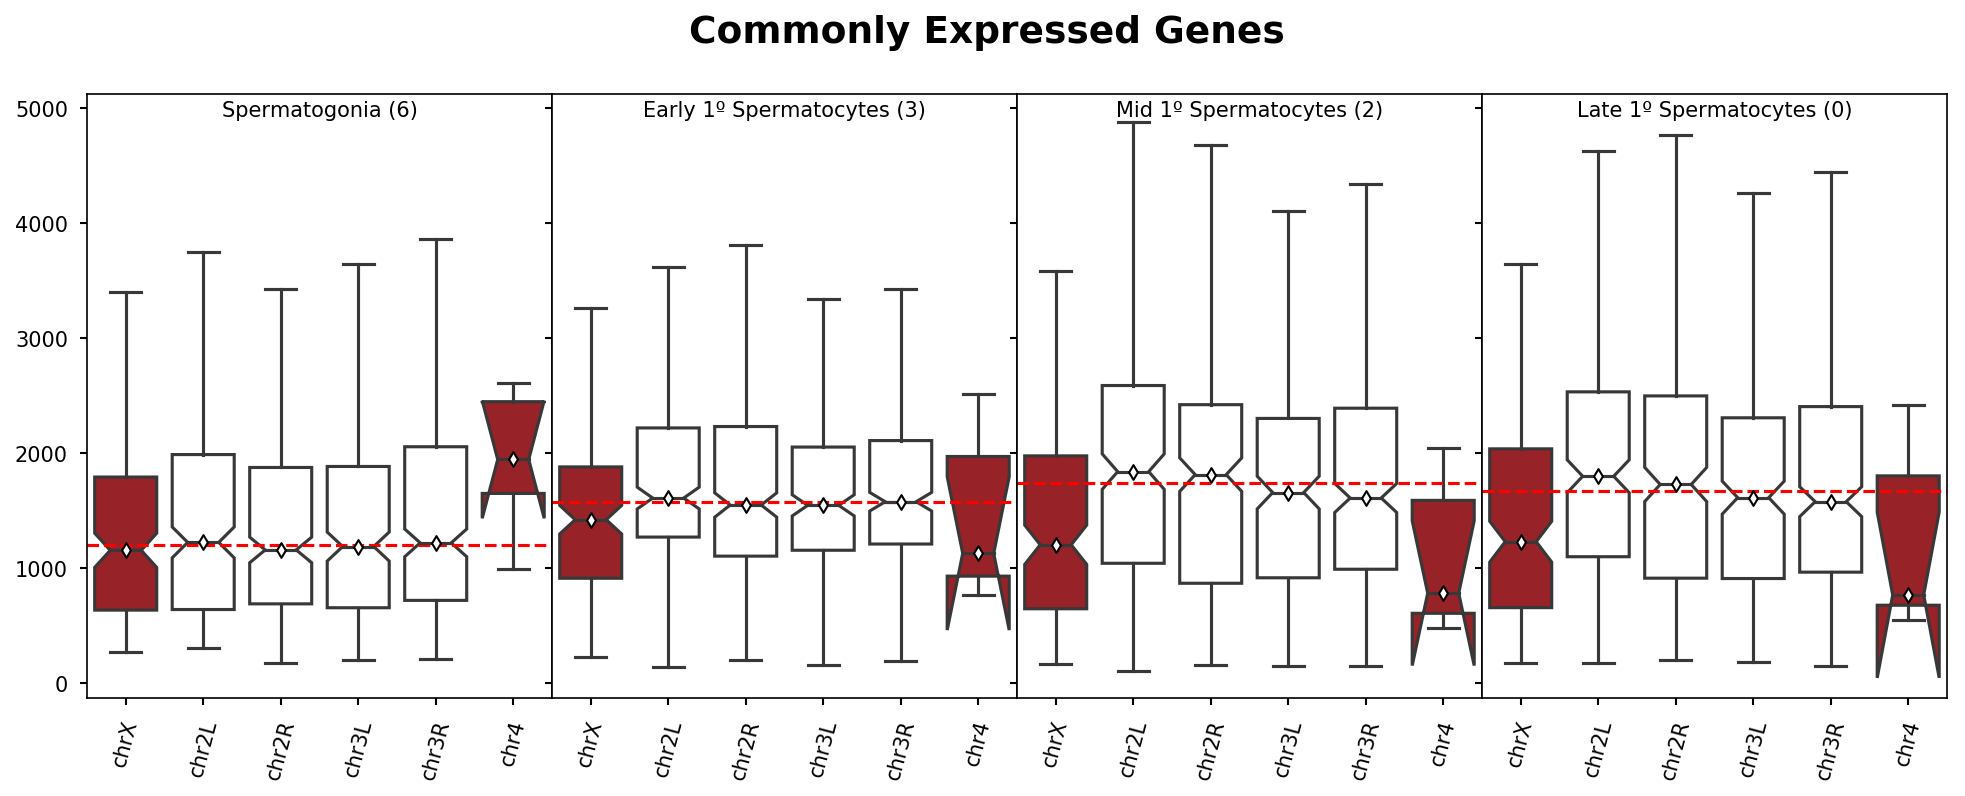

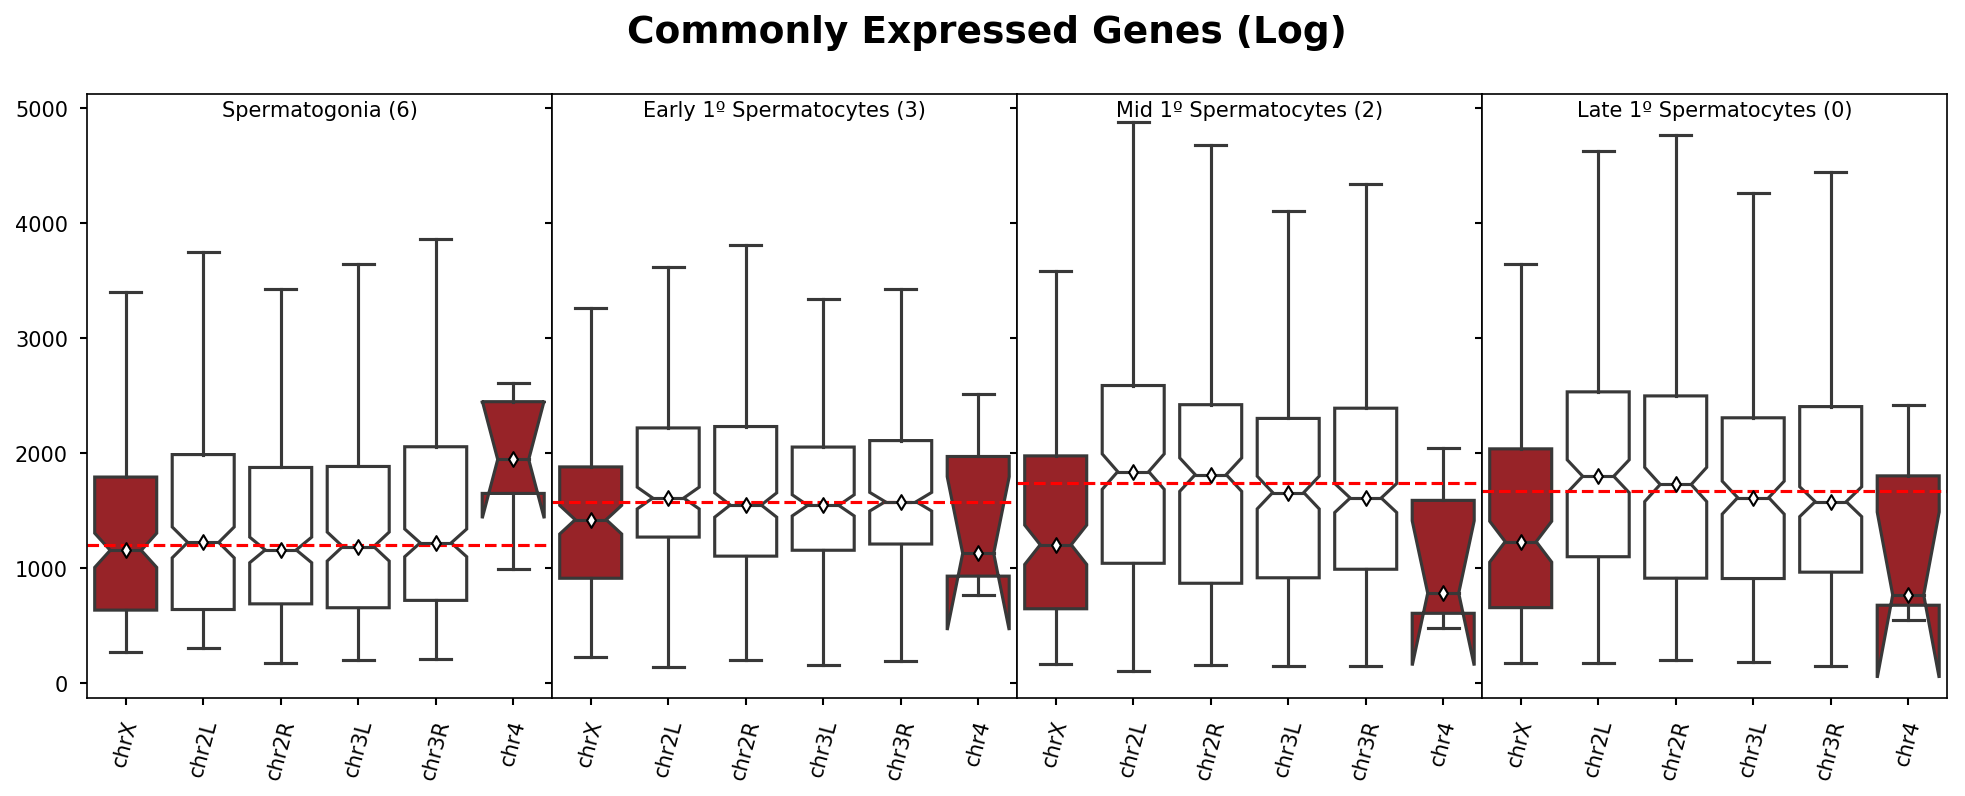

In [12]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[target_genes]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('Commonly Expressed Genes')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('Commonly Expressed Genes (Log)')

## Tau Haiwang

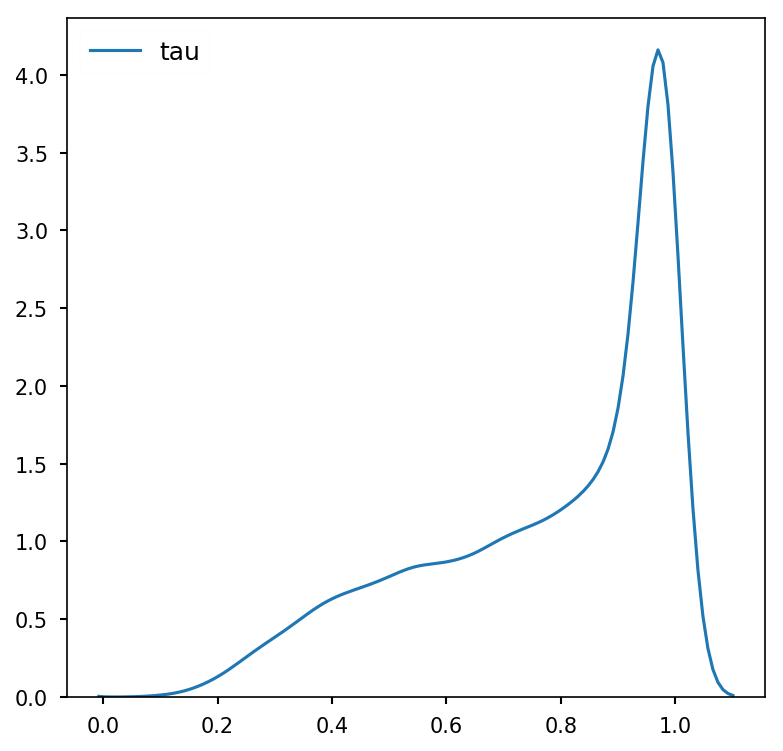

In [13]:
htau = pd.read_csv('../output/2018-02-05_tau_haiwang_male_tau.tsv', sep='\t', index_col=0)
sns.kdeplot(htau.tau.dropna())

### 0.4

1259


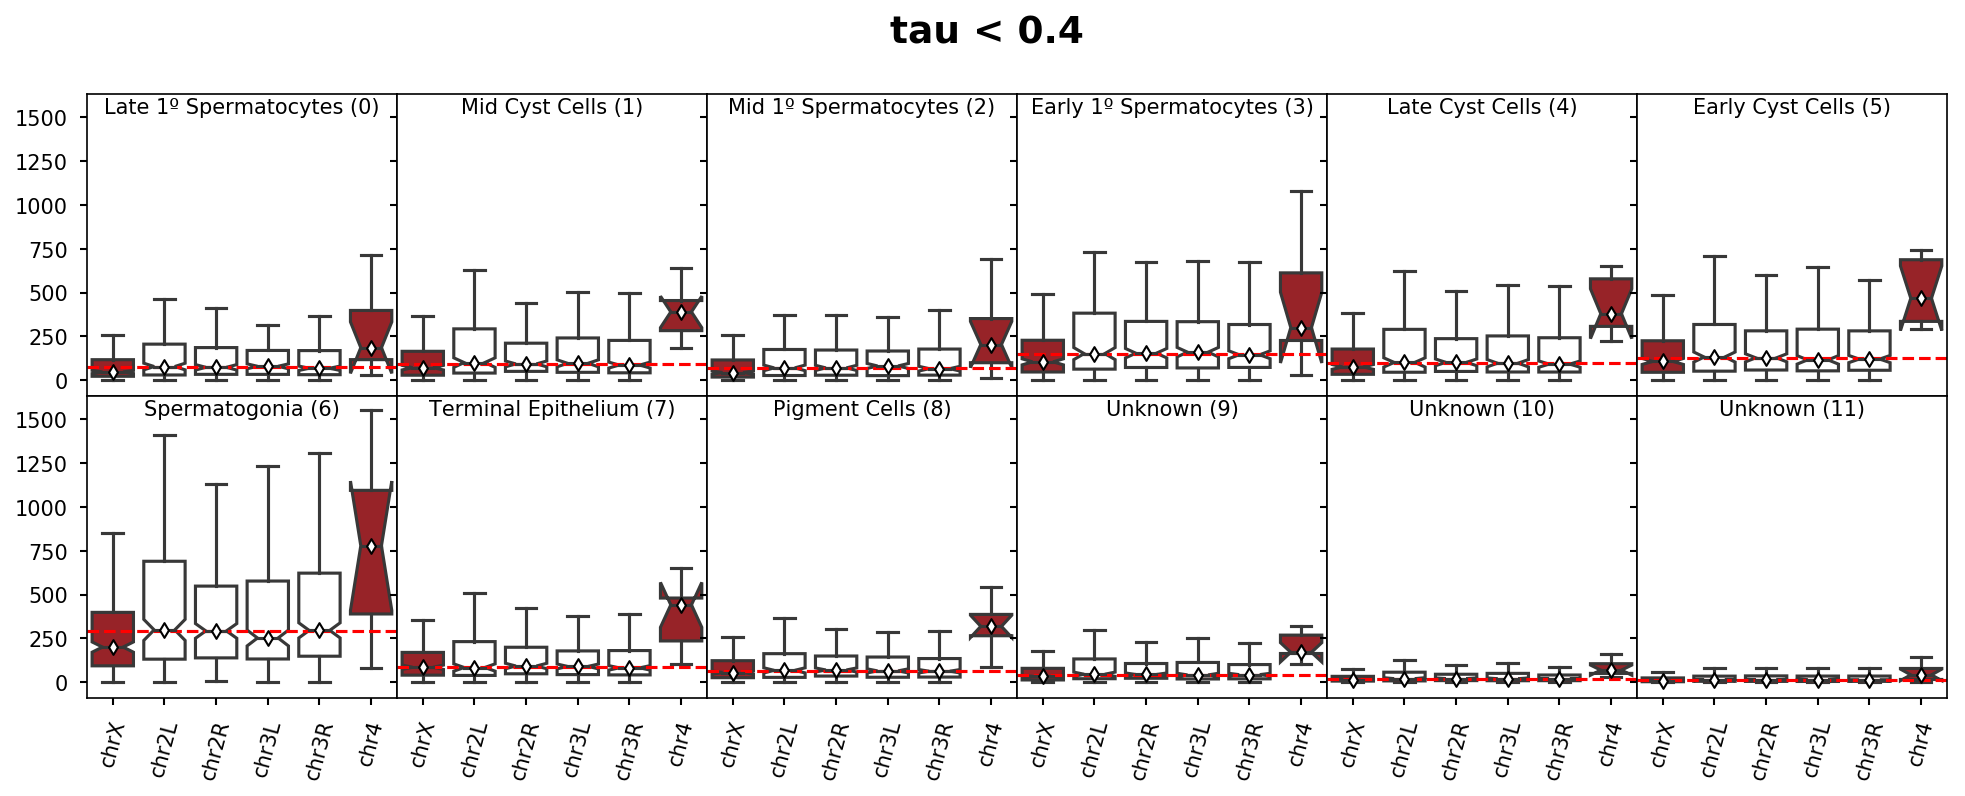

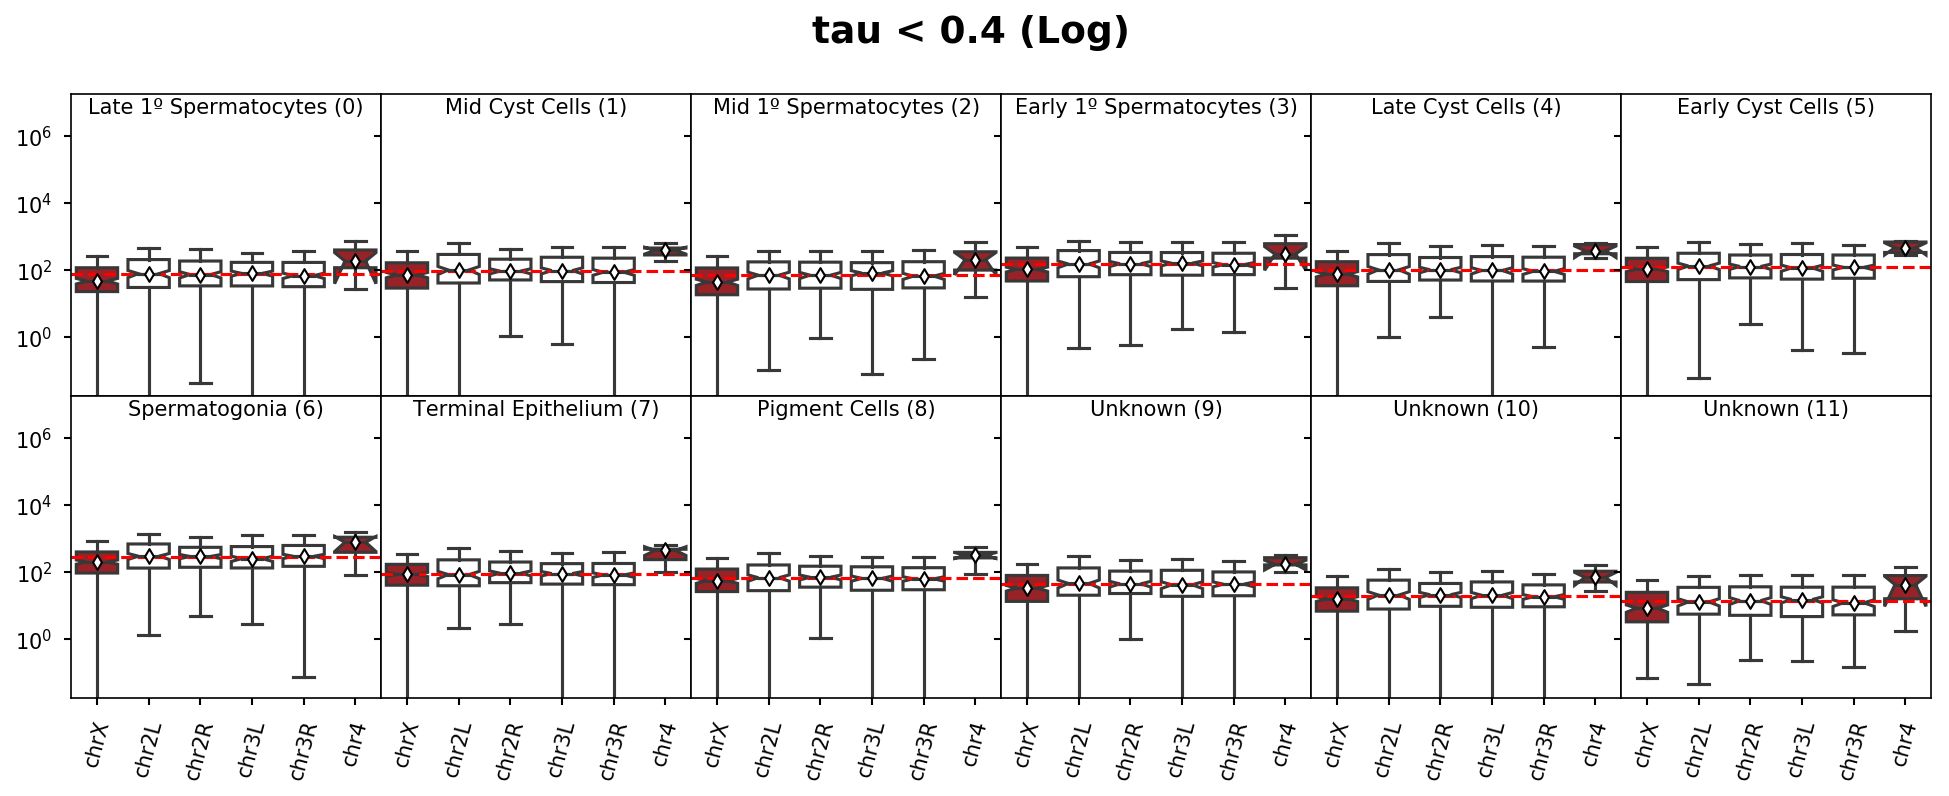

In [14]:
htau = pd.read_csv('../output/2018-02-05_tau_haiwang_male_tau.tsv', sep='\t', index_col=0)
tau_genes = htau[(htau.tau < .4)].index.tolist()
norm = norm_data(nbconfig.seurat_dir)
tau_targets = norm.index[norm.index.isin(tau_genes)].tolist()

print(len(tau_targets))

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tau_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('tau < 0.4')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('tau < 0.4 (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [15]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.638002  0.770866  0.625577  0.691740  0.780603  0.854467  0.692536   
chr2L  1.054916  1.080416  1.002427  1.000659  1.043498  1.054736  1.030086   
chr2R  0.993589  0.999024  1.002391  1.016115  1.047967  1.018211  1.010050   
chr3L  1.072195  1.035883  1.158412  1.055503  0.997574  0.925641  0.871015   
chr3R  0.922042  0.928567  0.939346  0.957066  0.945117  0.962582  1.020518   
chr4   2.502553  4.171058  2.890422  1.975859  3.887050  3.719282  2.684267   

             7         8         9         10        11  
chrom                                                    
chrX   0.967016  0.838464  0.759296  0.791622  0.601873  
chr2L  0.951272  1.030109  1.039714  1.034810  0.925302  
chr2R  1.047609  1.062377  1.007752  1.057201  1.007263  
chr3L  1.020566  0.983385  0.948662  1.019663  1.087286  
chr3R  0.928446  0.953828  0.988888  0.918205  0.870582  
chr4   4.981816  4.825218  3.875273  3.462396  3.028766

In [16]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                                  
6        6.654590e-07  0.975083  0.697763
3        2.198402e-06  0.962752  0.484189
2        5.880602e-06  0.969429  0.462310
0        3.309580e-06  0.984488  0.575559

In [17]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.000006  0.891813  0.447093
3        0.000007  0.933340  0.217476
2        0.000008  0.933340  0.196569
0        0.000004  0.961306  0.235113

Text(0.5,0.98,'tau < 0.4 (Log)')

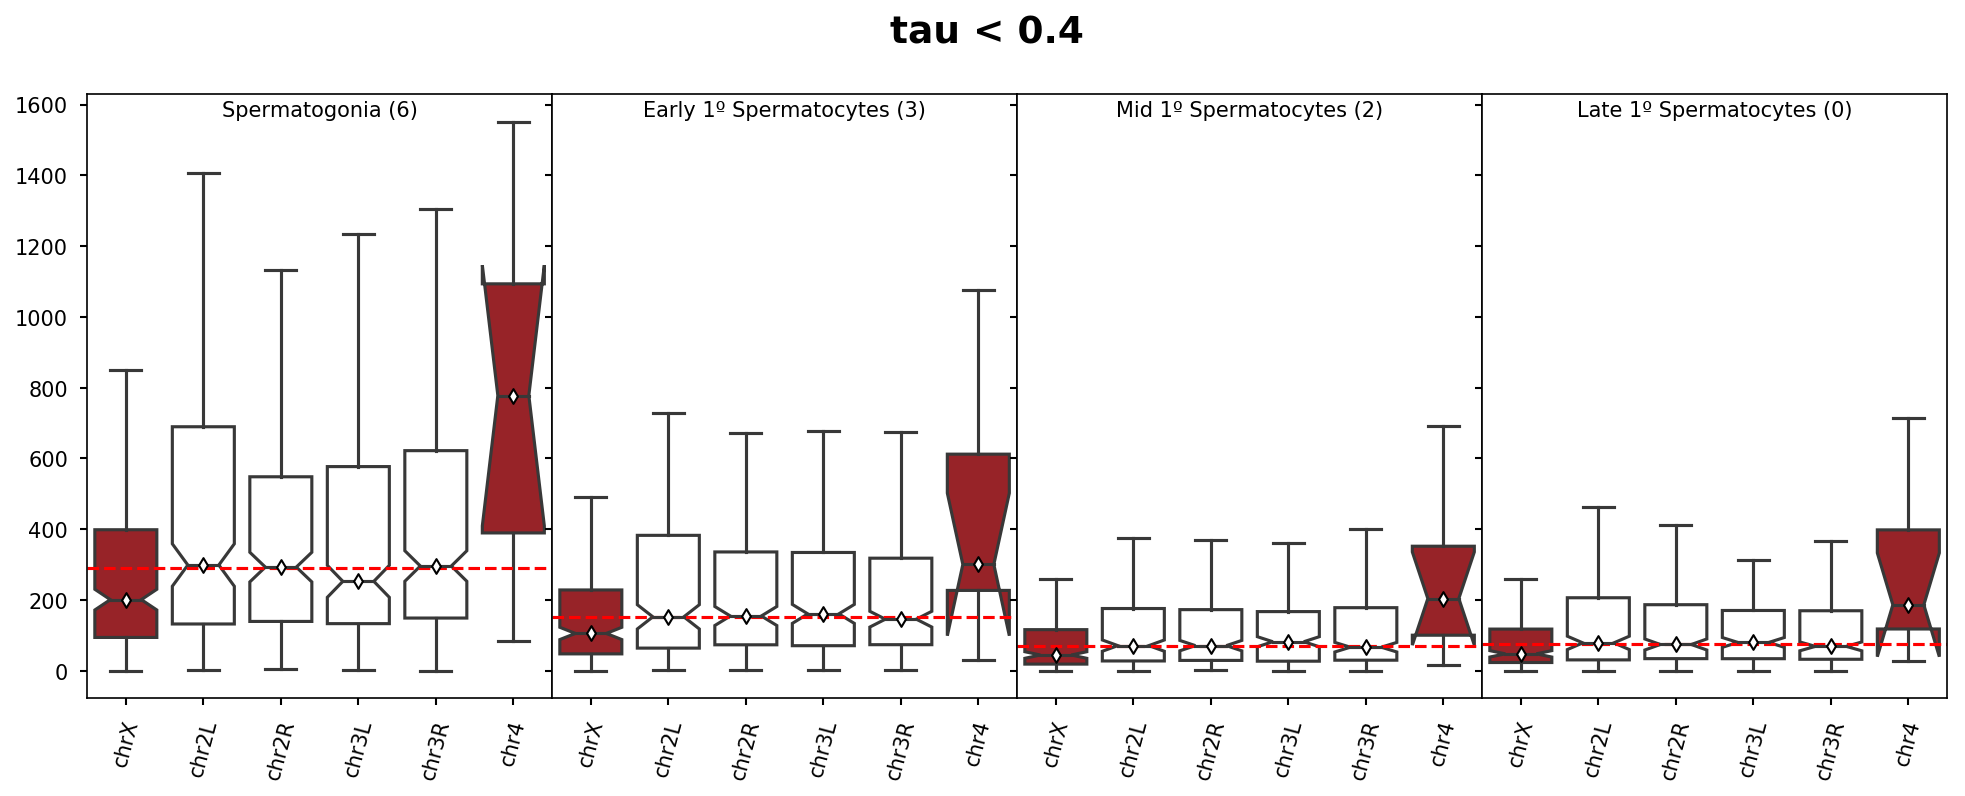

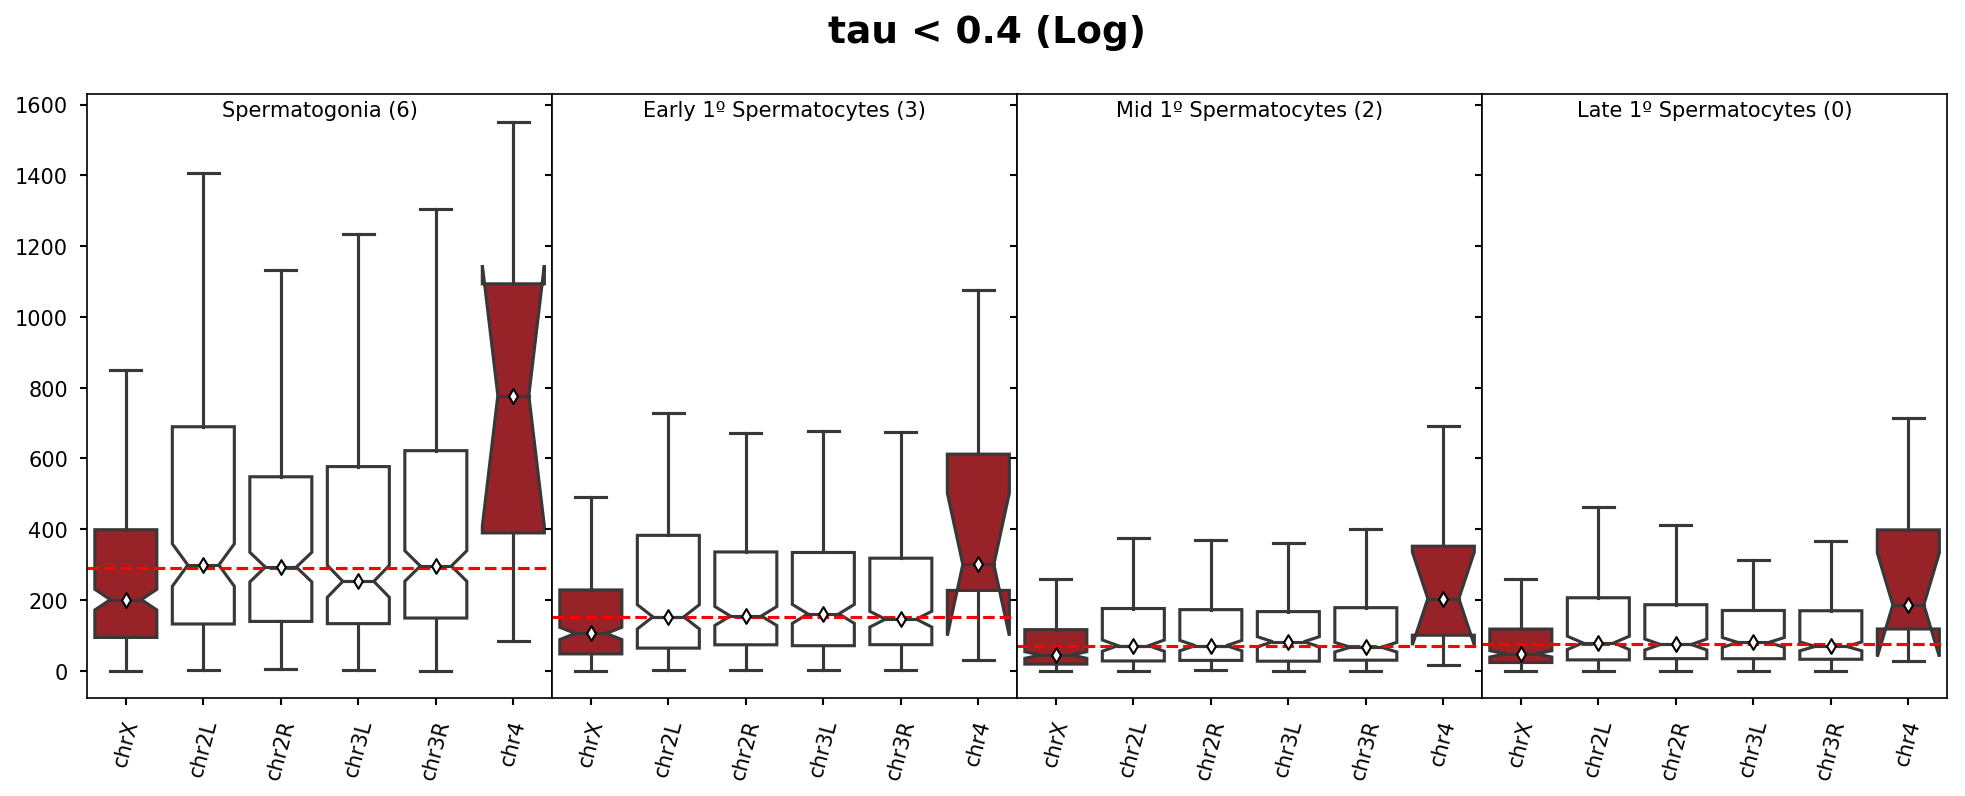

In [18]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tau_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('tau < 0.4')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('tau < 0.4 (Log)')

### 0.6

3584


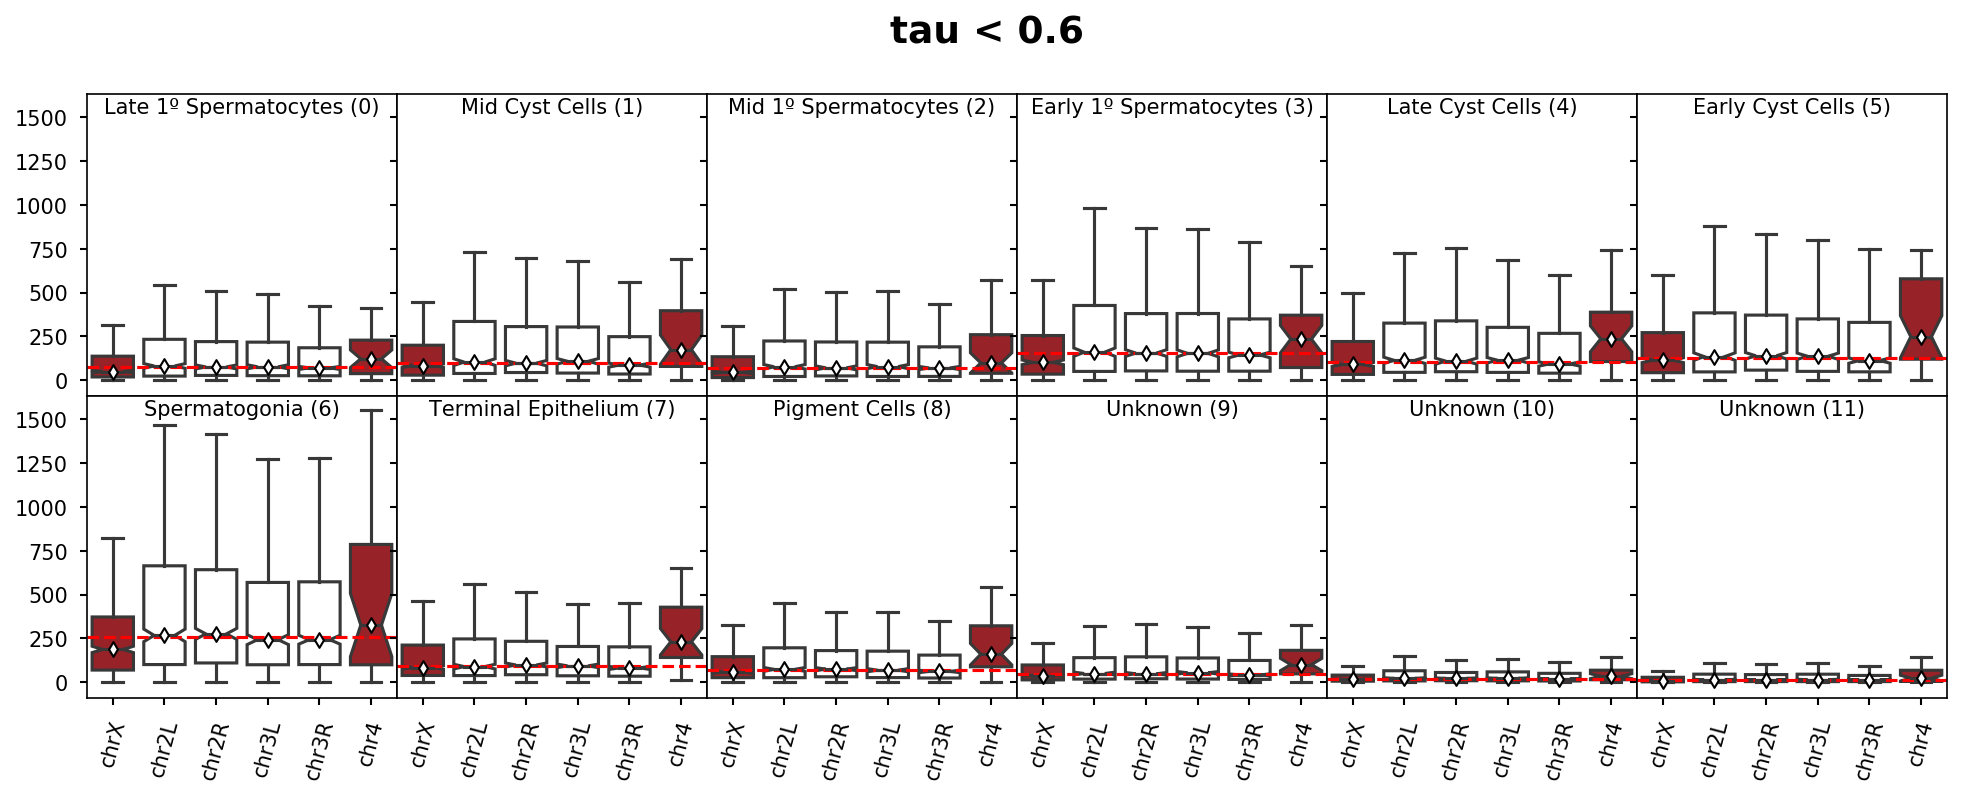

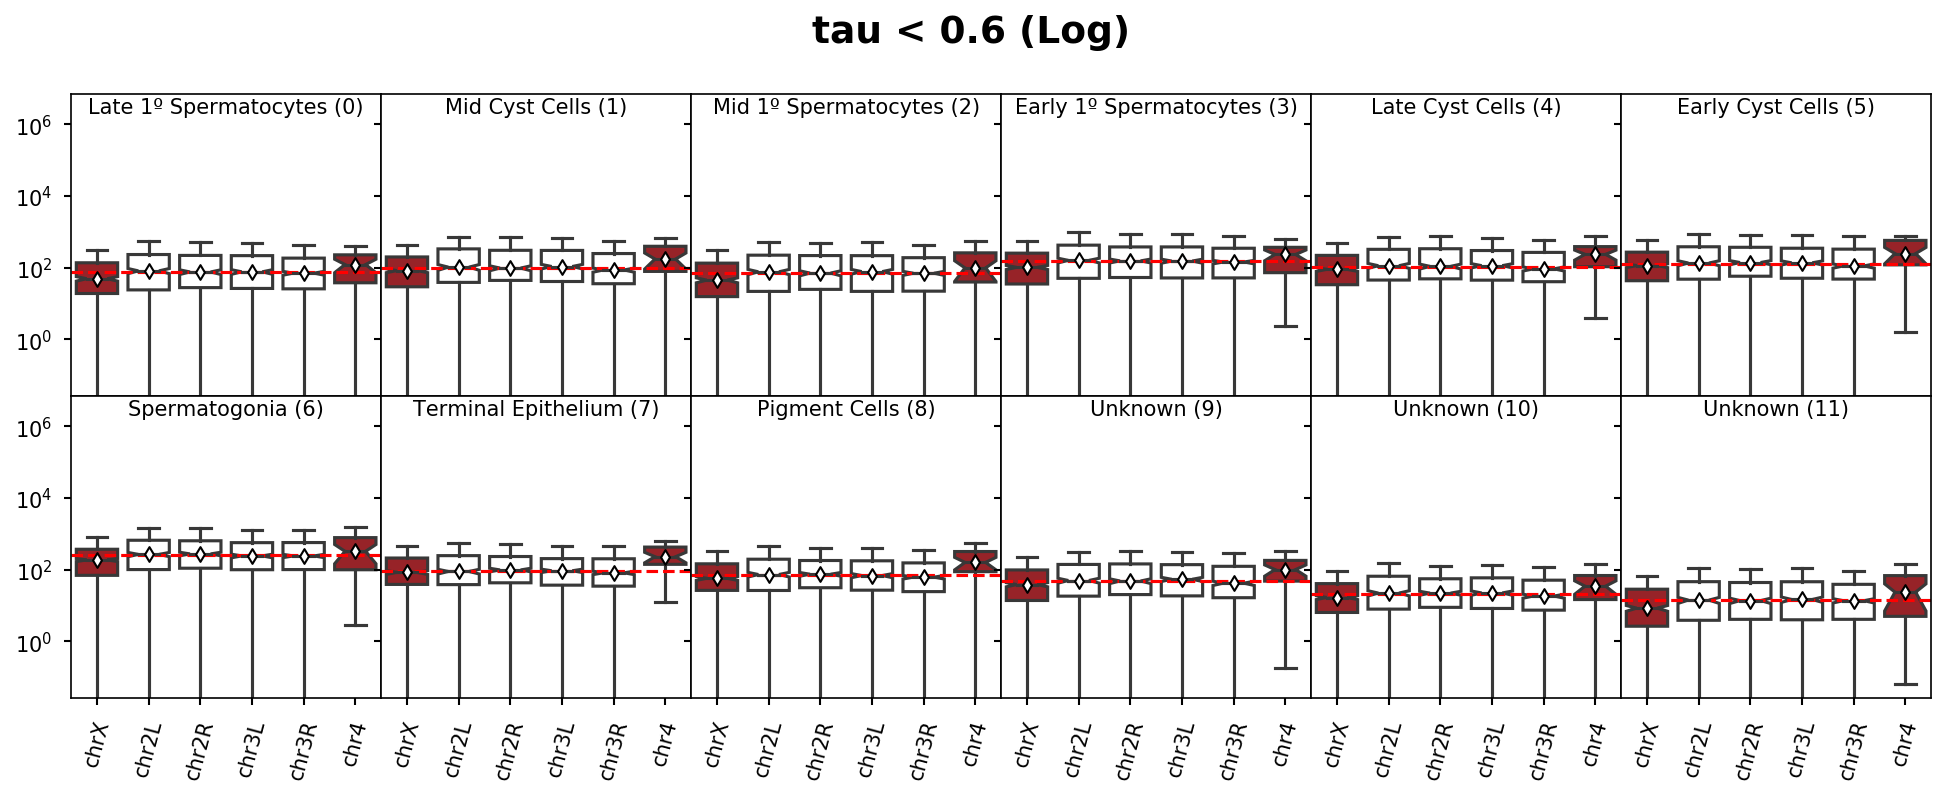

In [19]:
htau = pd.read_csv('../output/2018-02-05_tau_haiwang_male_tau.tsv', sep='\t', index_col=0)
tau_genes = htau[(htau.tau < .6)].index.tolist()
norm = norm_data(nbconfig.seurat_dir)
tau_targets = norm.index[norm.index.isin(tau_genes)].tolist()

print(len(tau_targets))

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tau_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('tau < 0.6')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('tau < 0.6 (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [20]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.650819  0.848253  0.623024  0.667397  0.855155  0.884467  0.726749   
chr2L  1.076143  1.059587  1.062368  1.044930  1.079786  1.043202  1.037354   
chr2R  1.002941  0.998103  0.977927  1.011511  1.035029  1.077816  1.070136   
chr3L  1.012593  1.104474  1.077003  1.000339  1.084347  1.058181  0.942594   
chr3R  0.929134  0.882937  0.968928  0.940356  0.882544  0.867351  0.941327   
chr4   1.616360  1.783073  1.366473  1.528570  2.242653  1.917502  1.265609   

             7         8         9         10        11  
chrom                                                    
chrX   0.932727  0.830623  0.810200  0.794783  0.600407  
chr2L  0.989515  1.060452  1.052786  1.054282  1.004198  
chr2R  1.091407  1.080262  1.018906  1.051945  0.972456  
chr3L  1.035388  0.994109  1.138577  1.062271  1.044938  
chr3R  0.907256  0.894659  0.886100  0.871376  0.967530  
chr4   2.553610  2.307740  2.125242  1.646813  1.674776

In [21]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                                  
6        1.280704e-09  0.718017  0.767483
3        2.018147e-09  0.757812  0.720967
2        2.539121e-09  0.790699  0.672355
0        2.201924e-09  0.846768  0.696210

In [22]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.000010  0.826494  0.800256
3        0.000010  0.866357  0.716480
2        0.000009  0.945739  0.630958
0        0.000017  0.930697  0.699023

Text(0.5,0.98,'tau < 0.6 (Log)')

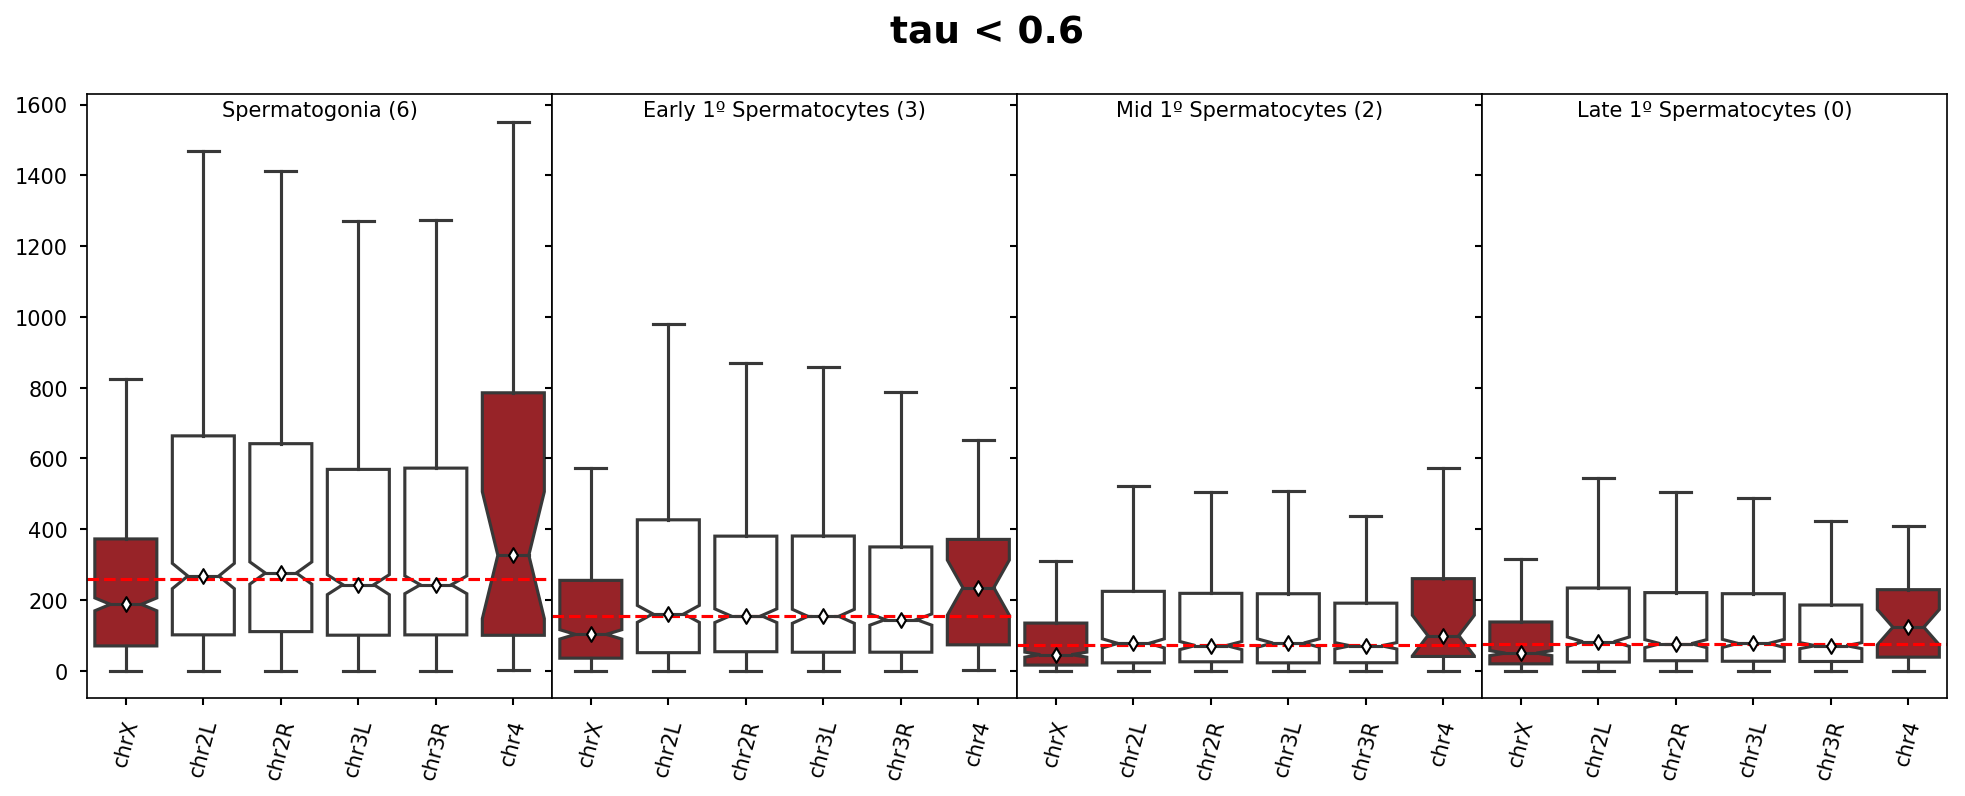

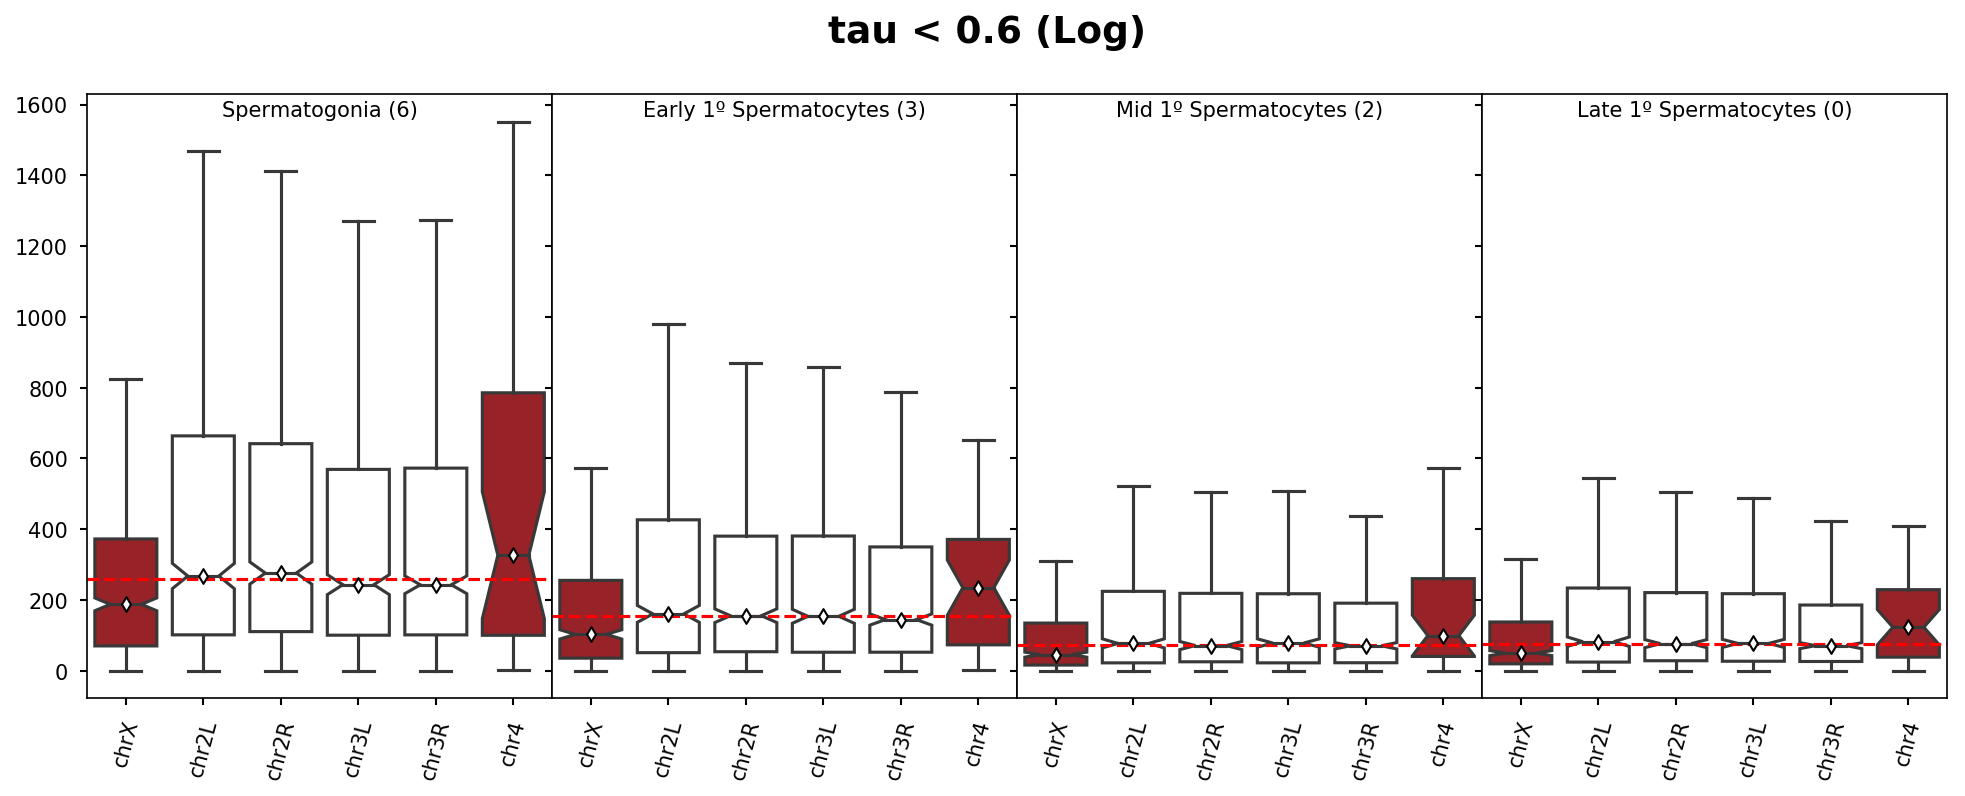

In [23]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tau_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('tau < 0.6')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('tau < 0.6 (Log)')

## TSPS Haiwang

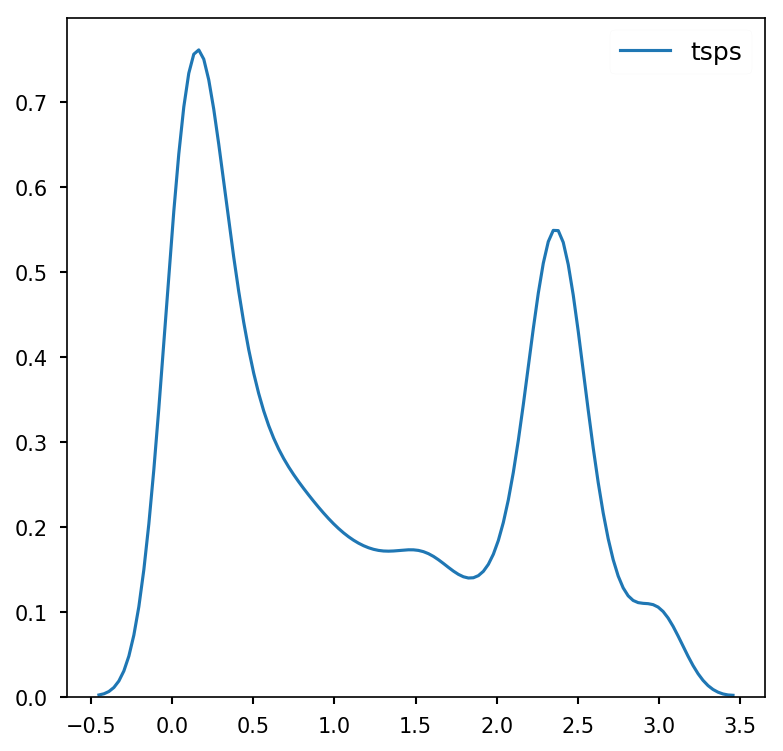

In [24]:
htsps = pd.read_csv('../output/2018-02-05_tau_haiwang_male_tsps.tsv', sep='\t', index_col=0)
sns.kdeplot(htsps.tsps.dropna())

### 1

7760


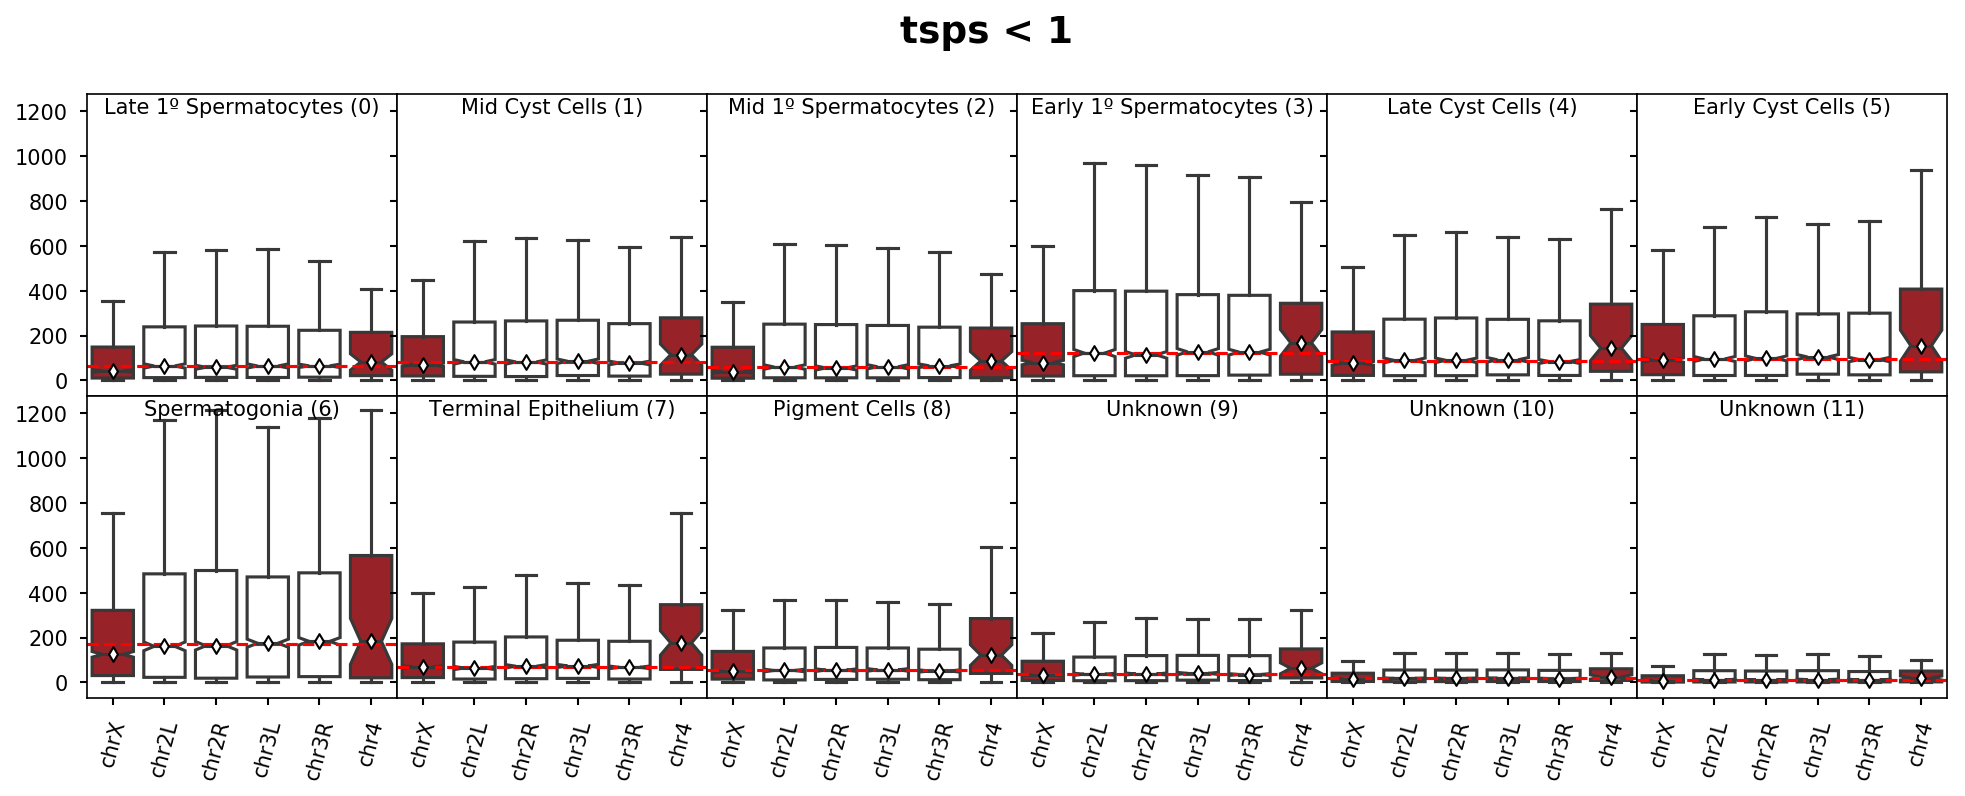

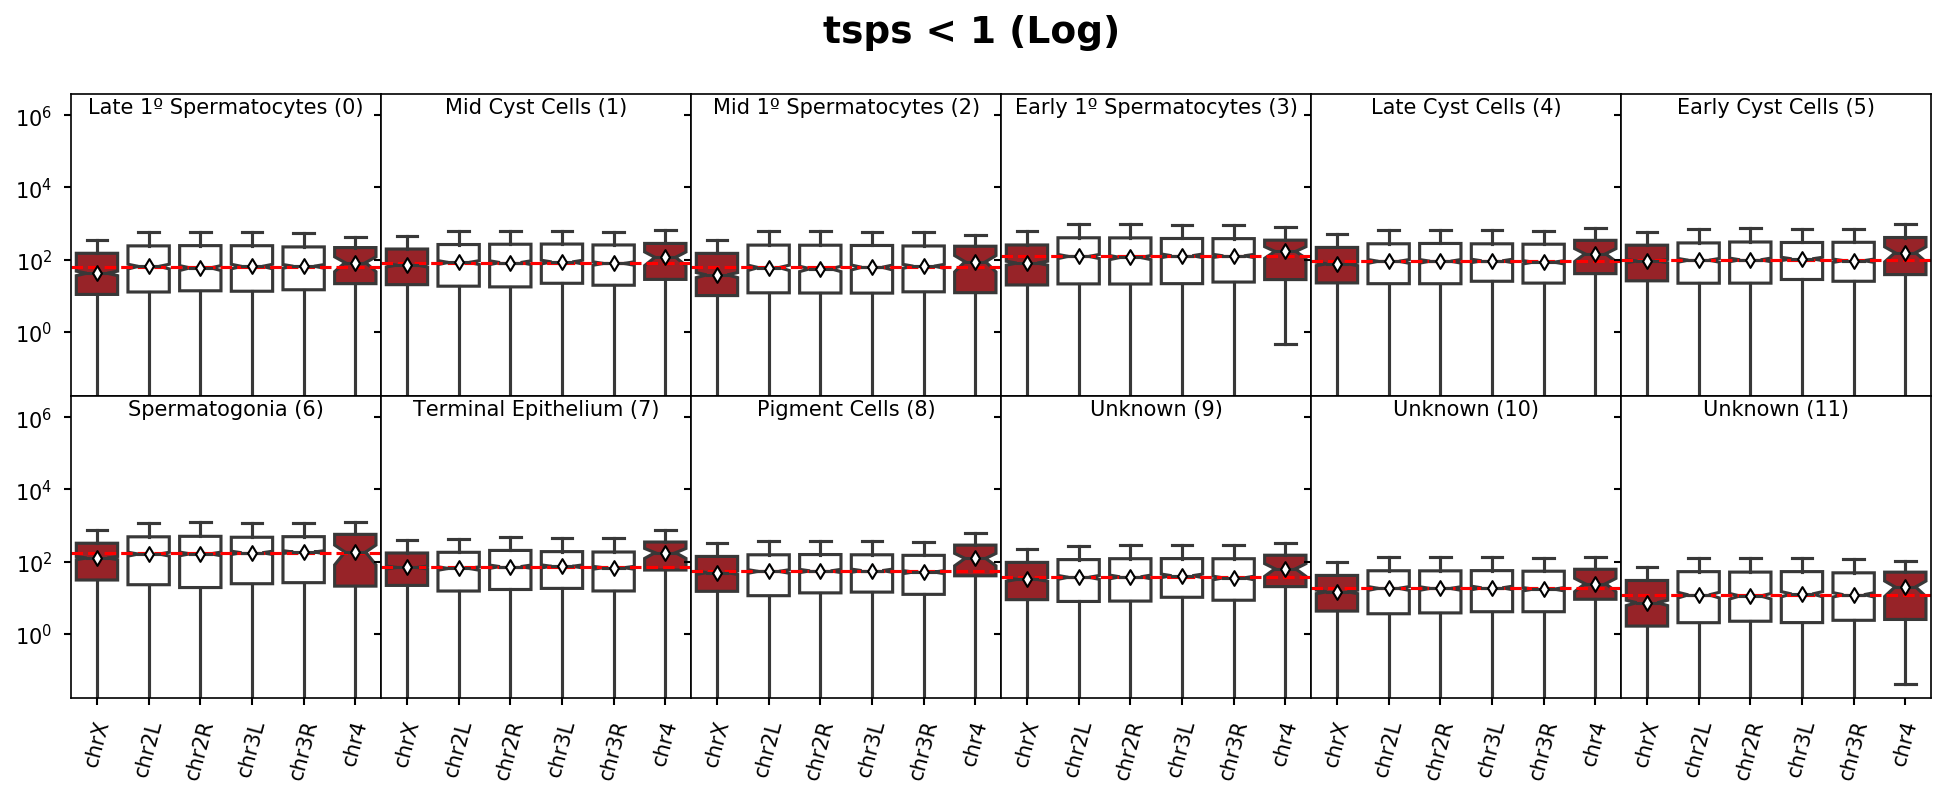

In [25]:
htsps = pd.read_csv('../output/2018-02-05_tau_haiwang_male_tsps.tsv', sep='\t', index_col=0)
tsps_genes = htsps[(htsps.tsps < 1)].index.tolist()
norm = norm_data(nbconfig.seurat_dir)
tsps_targets = norm.index[norm.index.isin(tsps_genes)].tolist()

print(len(tsps_targets))

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tsps_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('tsps < 1')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('tsps < 1 (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [26]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.654850  0.850296  0.621719  0.649733  0.860517  0.939850  0.734437   
chr2L  1.013015  1.012467  0.991227  0.995826  1.008653  0.988942  0.944315   
chr2R  0.922590  1.005365  0.922005  0.929785  1.014377  1.014879  0.958440   
chr3L  1.013223  1.045107  1.009797  1.038653  1.039408  1.079896  1.025932   
chr3R  1.021827  0.950798  1.082842  1.028667  0.953547  0.962589  1.074118   
chr4   1.293404  1.404265  1.442016  1.365200  1.627441  1.602602  1.073313   

             7         8         9         10        11  
chrom                                                    
chrX   0.995611  0.917364  0.857383  0.808606  0.609261  
chr2L  0.933503  0.996144  0.981815  1.007365  1.002263  
chr2R  1.048321  1.027309  1.009774  1.003094  0.934139  
chr3L  1.068751  1.045449  1.084065  1.039850  1.060130  
chr3R  0.977634  0.954064  0.944165  0.958238  1.014304  
chr4   2.554526  2.276796  1.691957  1.359558  1.666060

In [27]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                                  
6        5.126540e-05  0.748873  0.222295
3        1.324582e-09  0.674396  0.355861
2        1.635160e-10  0.690244  0.404090
0        1.671432e-09  0.719425  0.392305

In [28]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                              
6        0.003235  0.918036  0.463346
3        0.000015  0.940709  0.595722
2        0.000005  0.951201  0.632085
0        0.000016  0.950374  0.635621

Text(0.5,0.98,'tsps < 1 (Log)')

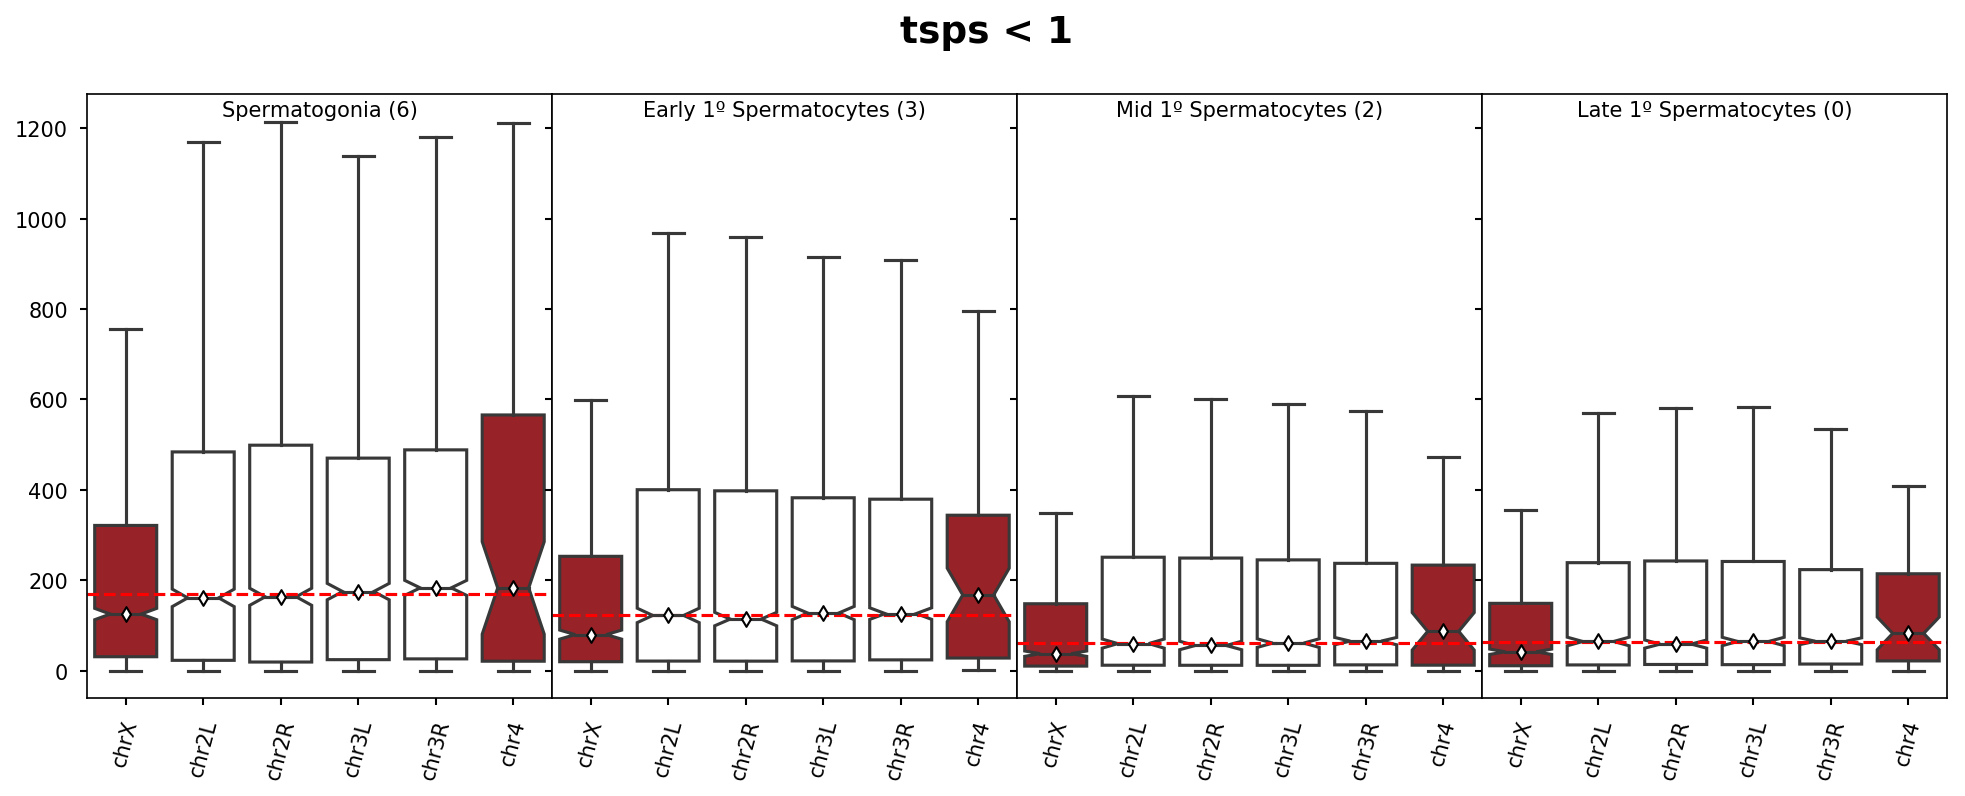

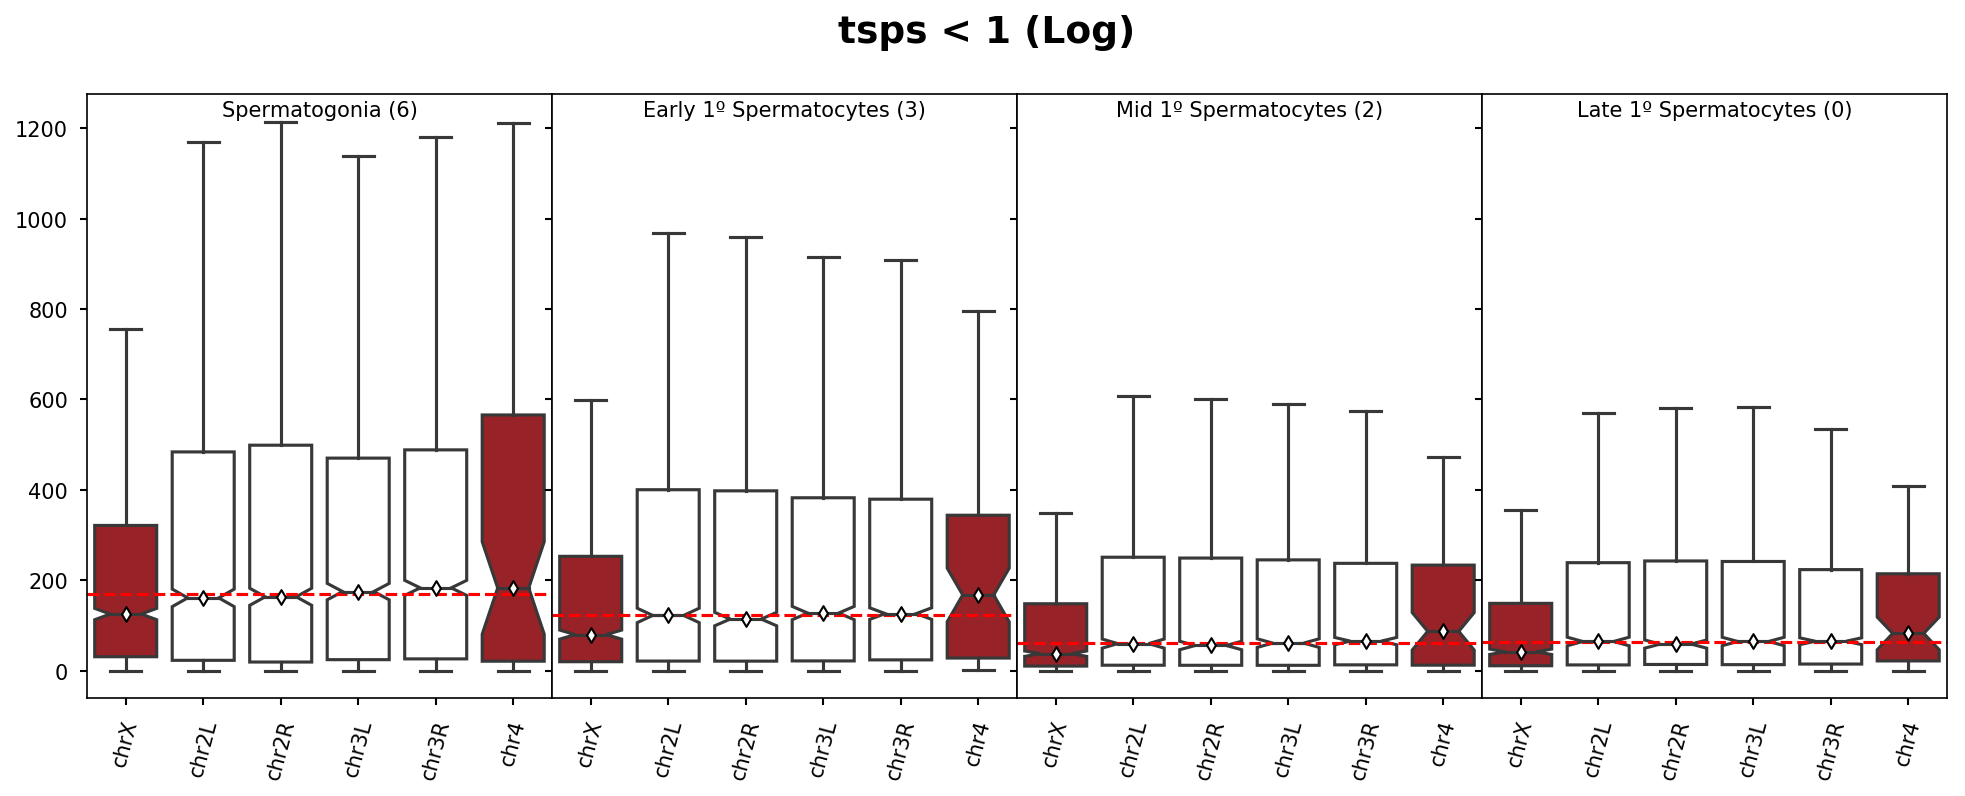

In [29]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tsps_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('tsps < 1')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('tsps < 1 (Log)')

## Tau modENCODE

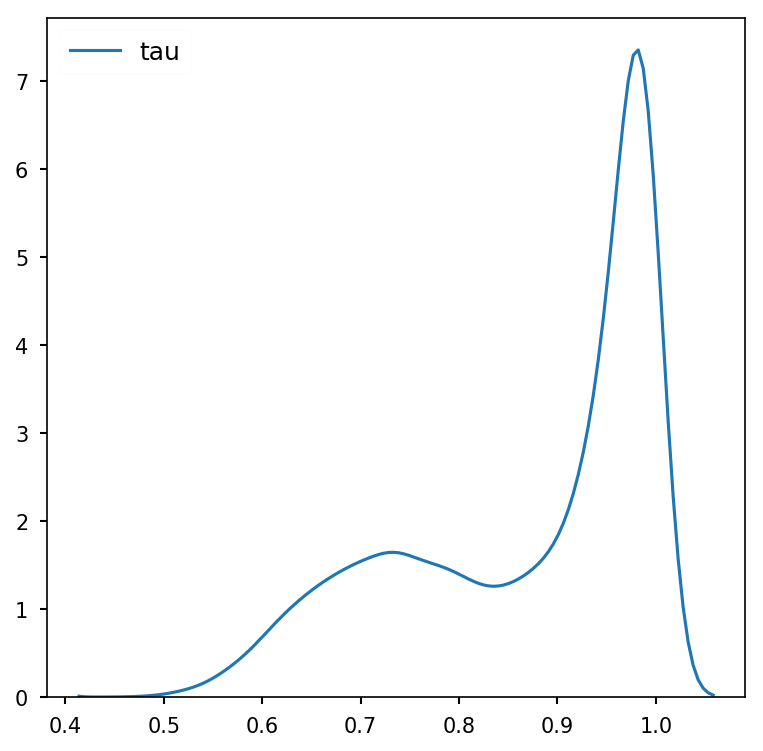

In [30]:
mtau = pd.read_csv('../output/2018-02-05_tau_modENCODE_tau.tsv', sep='\t', header=None)
mtau.columns = ['FBgn', 'tau']
mtau.set_index('FBgn', inplace=True)
sns.kdeplot(mtau.tau.dropna())

### 0.7

2341


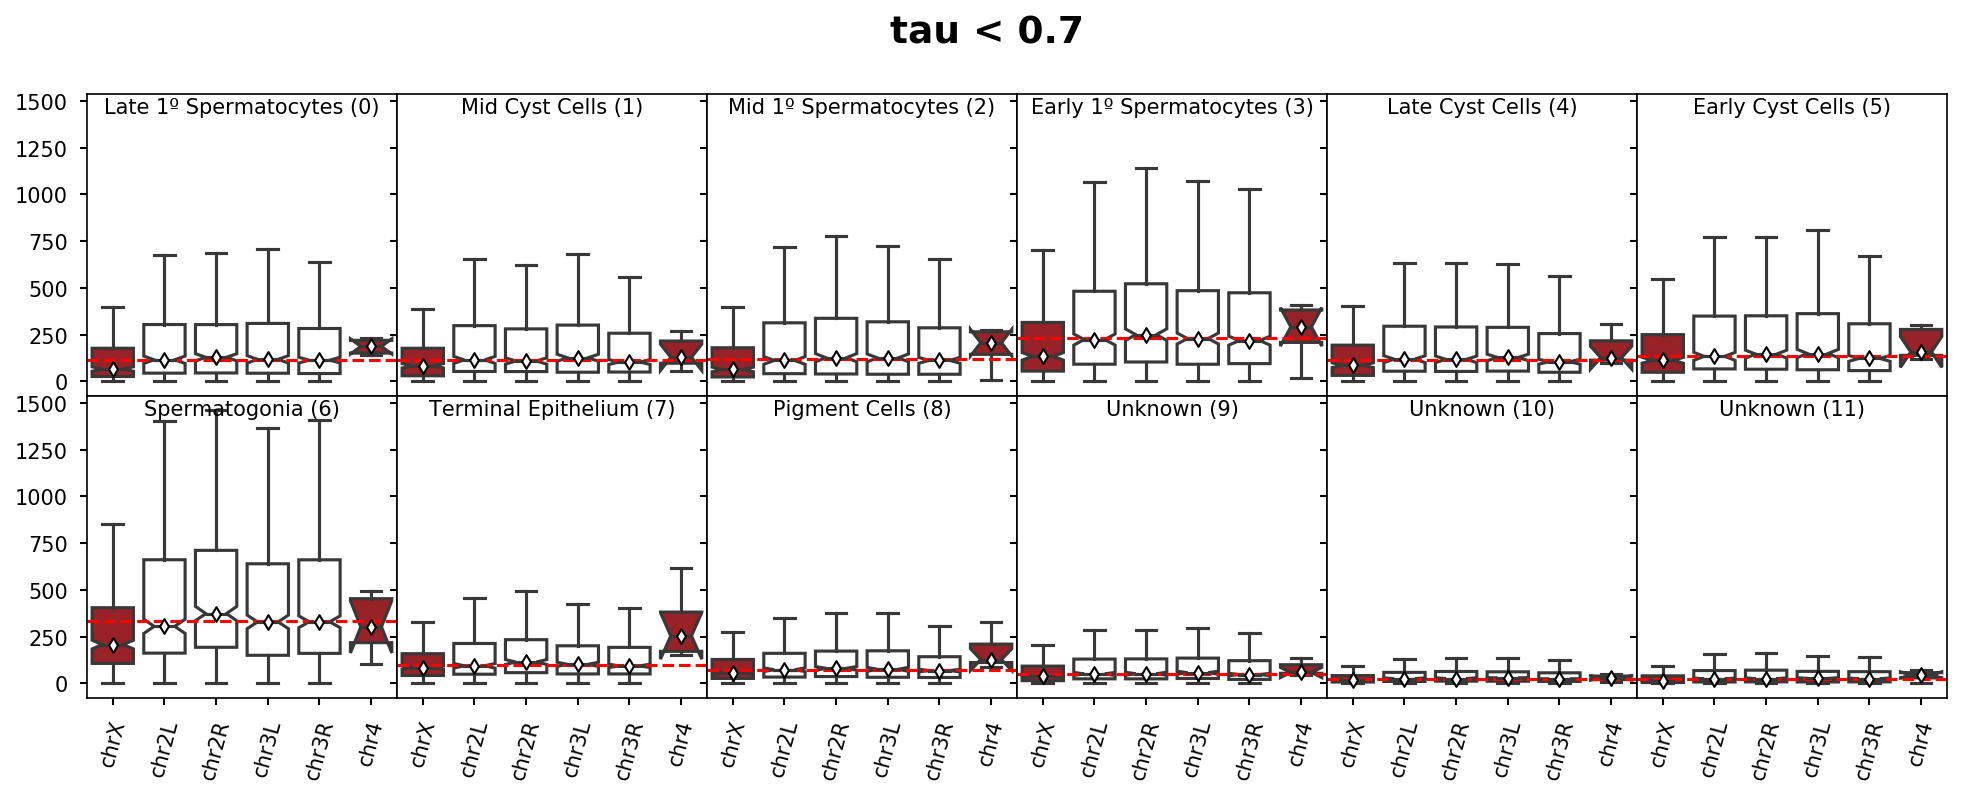

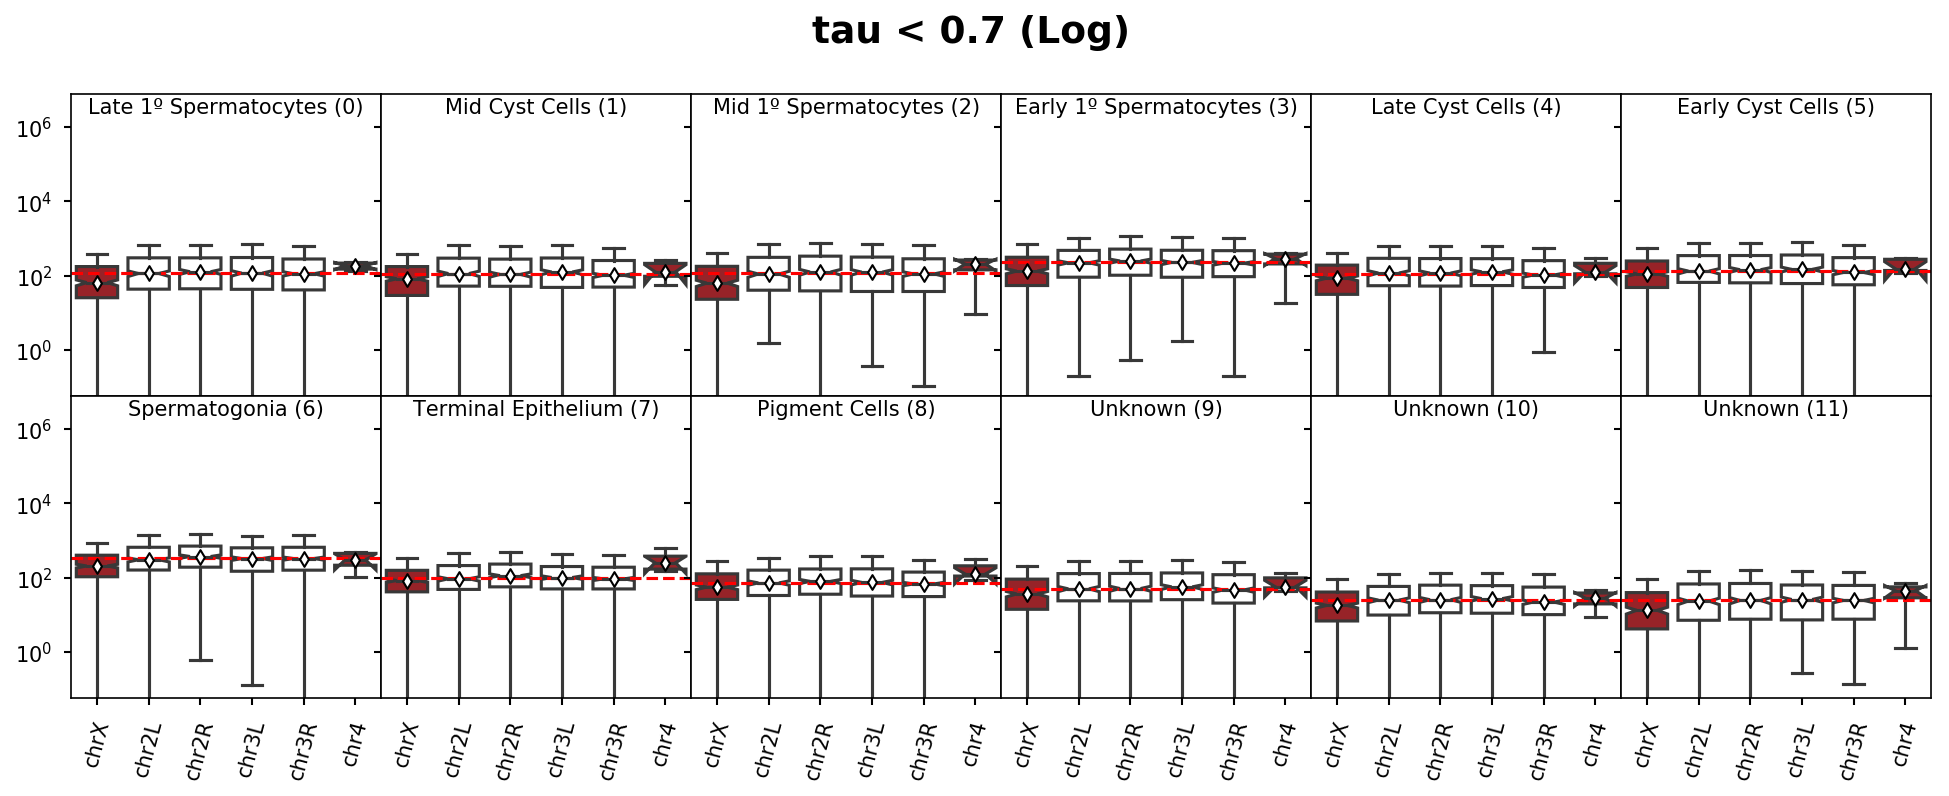

In [31]:
mtau = pd.read_csv('../output/2018-02-05_tau_modENCODE_tau.tsv', sep='\t', header=None)
mtau.columns = ['FBgn', 'tau']
mtau.set_index('FBgn', inplace=True)

tau_genes = mtau[(mtau.tau < .7)].index.tolist()
norm = norm_data(nbconfig.seurat_dir)
tau_targets = norm.index[norm.index.isin(tau_genes)].tolist()

print(len(tau_targets))

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tau_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('tau < 0.7')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('tau < 0.7 (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [32]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.563595  0.742596  0.543092  0.579945  0.758067  0.822963  0.618795   
chr2L  0.990529  1.026505  0.953874  0.971316  1.041018  0.979124  0.909511   
chr2R  1.103486  0.974189  1.079385  1.084835  1.034851  1.065078  1.113594   
chr3L  1.009594  1.128670  1.070296  0.994707  1.121763  1.088532  0.980801   
chr3R  0.974055  0.924635  0.957879  0.945896  0.921708  0.898125  0.982576   
chr4   1.604663  1.149826  1.765332  1.265796  1.110644  1.149246  0.901658   

             7         8         9         10        11  
chrom                                                    
chrX   0.843956  0.767284  0.724004  0.735866  0.543350  
chr2L  0.939941  0.996409  0.993144  1.020796  0.960323  
chr2R  1.141225  1.096238  1.012863  1.044664  0.998501  
chr3L  1.017715  1.026510  1.121650  1.117786  1.058368  
chr3R  0.934319  0.934685  0.929095  0.902423  0.999826  
chr4   2.544579  1.738110  1.142748  1.165316  1.839023

In [33]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                                  
6        5.024552e-16  0.459465  0.271689
3        6.066712e-13  0.640877  0.427098
2        8.856307e-12  0.787279  0.526780
0        2.514661e-12  0.750252  0.540000

In [34]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                                  
6        3.886648e-11  0.304640  0.319334
3        3.340757e-08  0.738548  0.584714
2        2.937244e-07  0.695360  0.681660
0        1.513067e-07  0.738548  0.732158

Text(0.5,0.98,'tau < 0.7 (Log)')

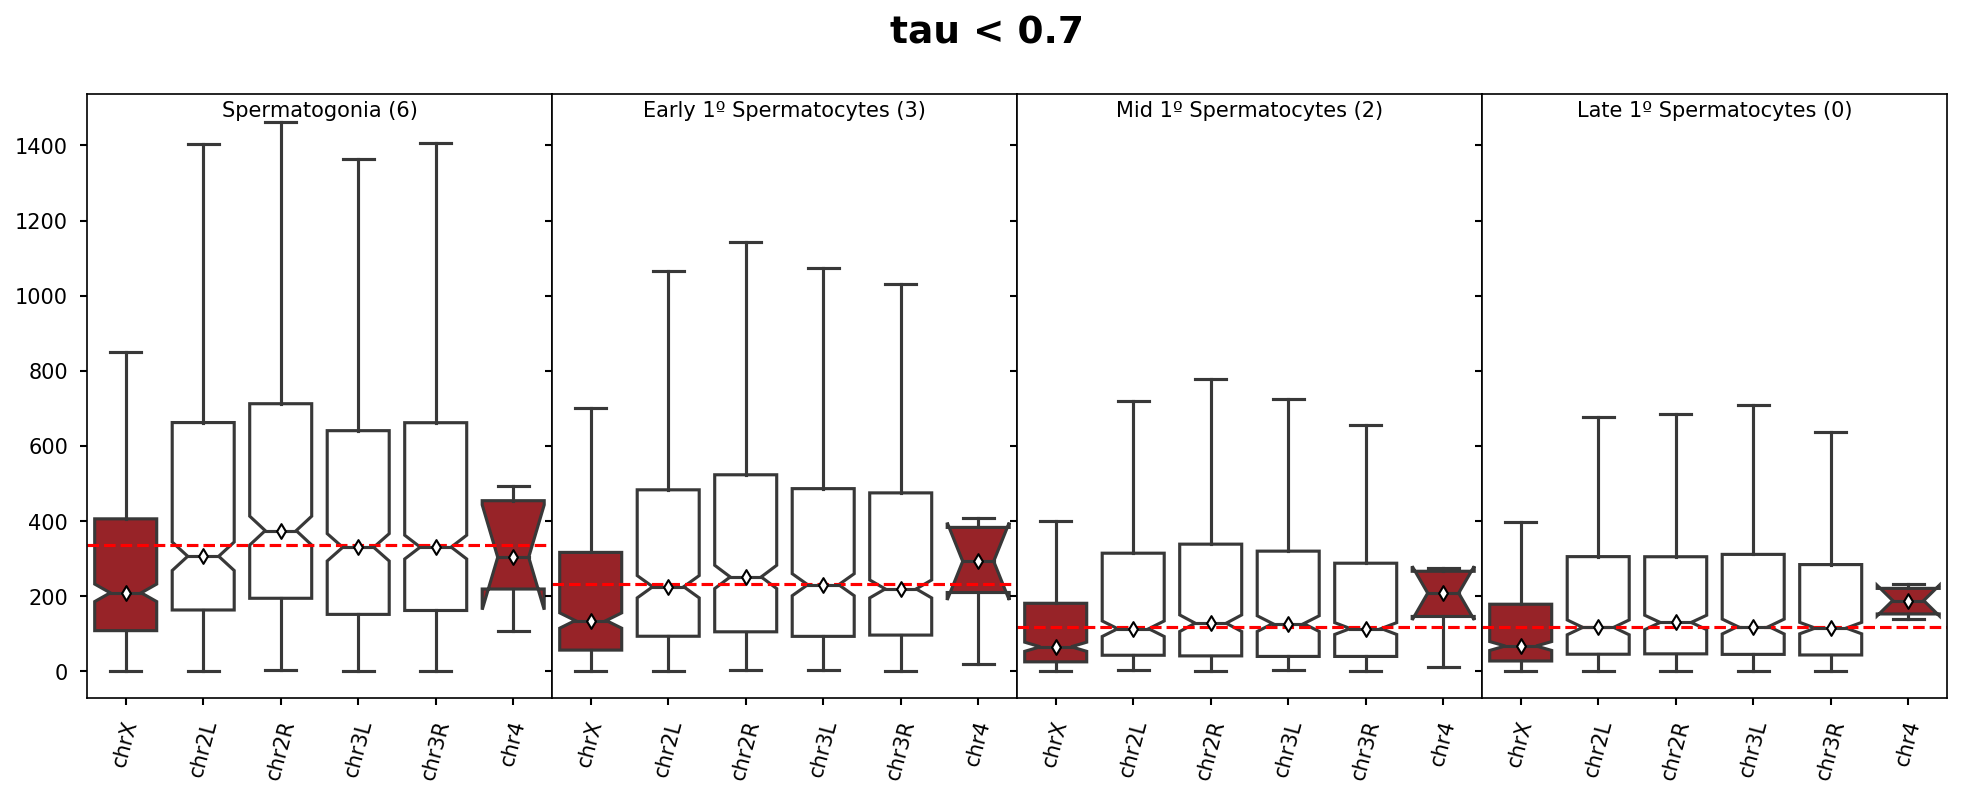

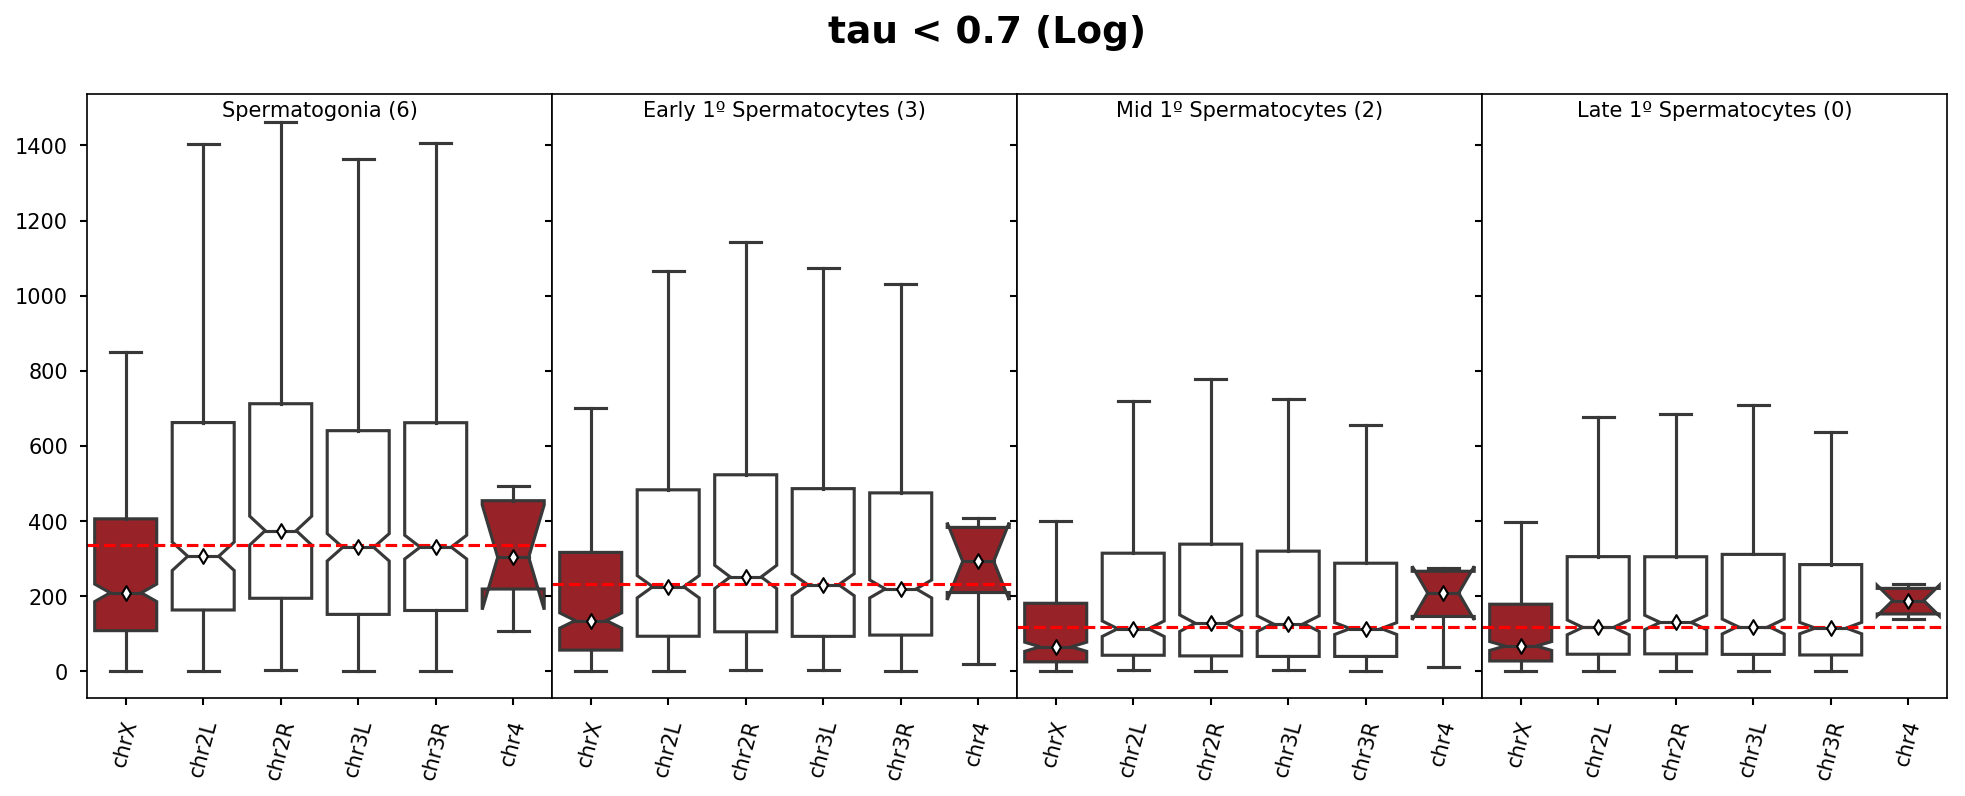

In [35]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tau_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('tau < 0.7')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('tau < 0.7 (Log)')

## TSPS modENCODE

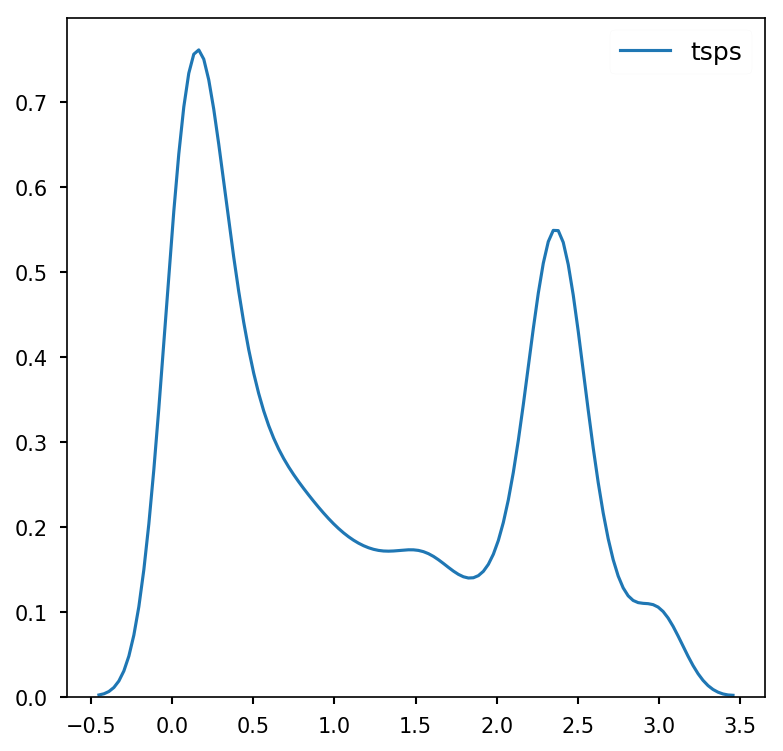

In [36]:
mtsps = pd.read_csv('../output/2018-02-05_tau_modENCODE_tsps.tsv', sep='\t', header=None)
mtsps.columns = ['FBgn', 'tsps']
mtsps.set_index('FBgn', inplace=True)
sns.kdeplot(htsps.tsps.dropna())

### 1

6222


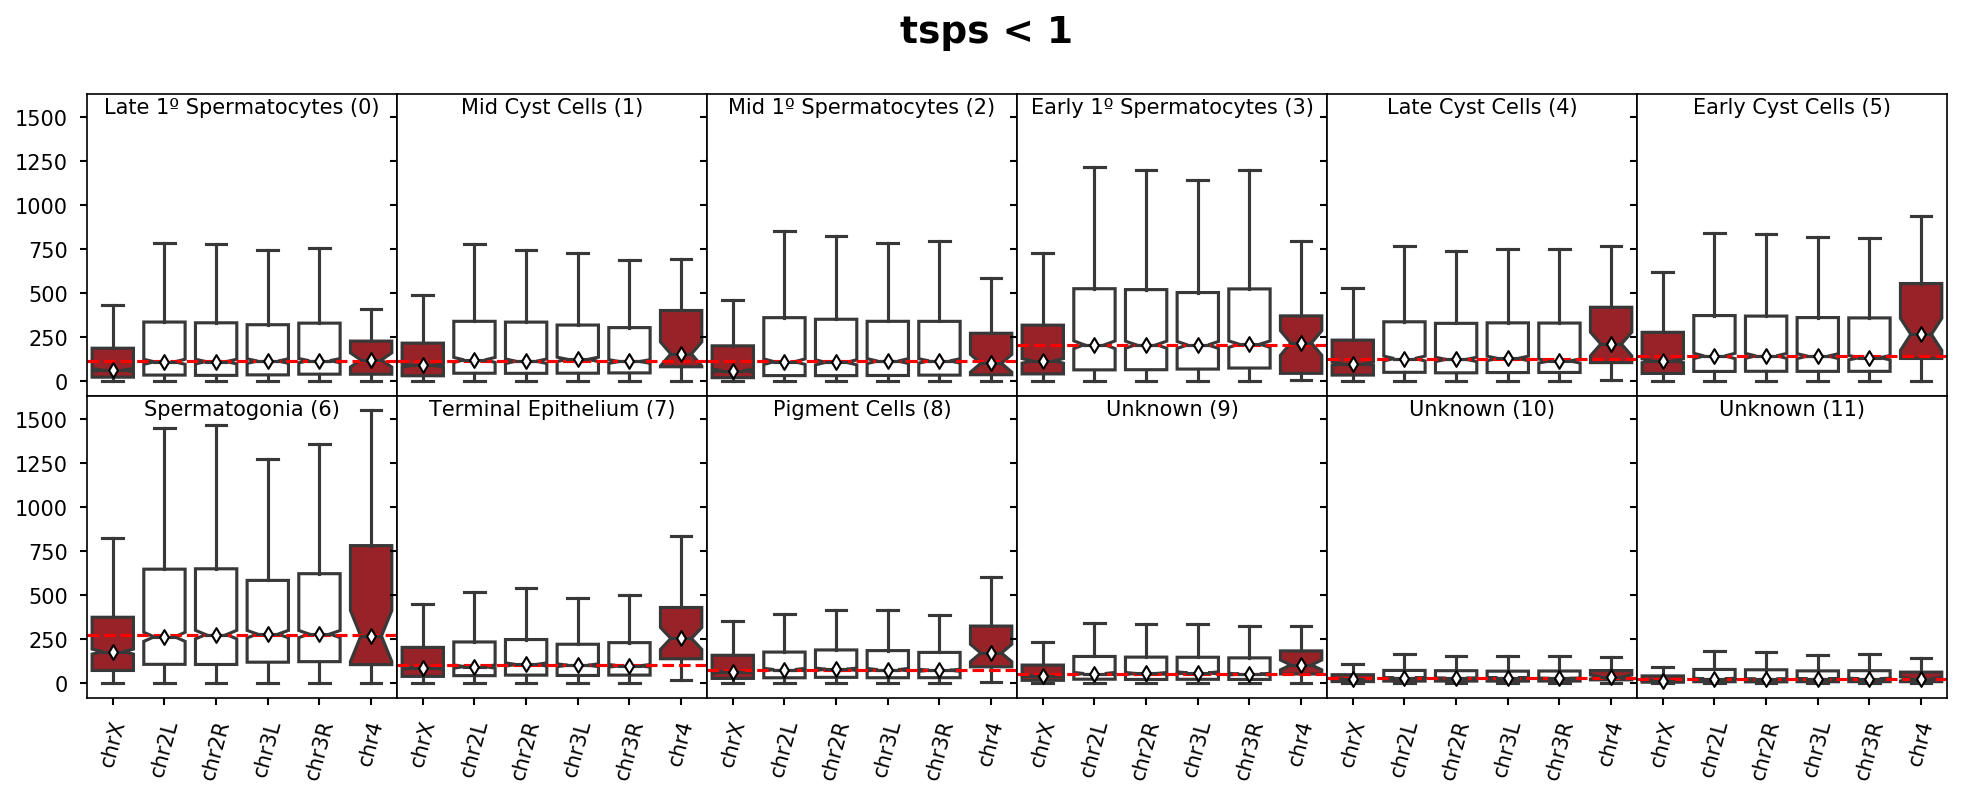

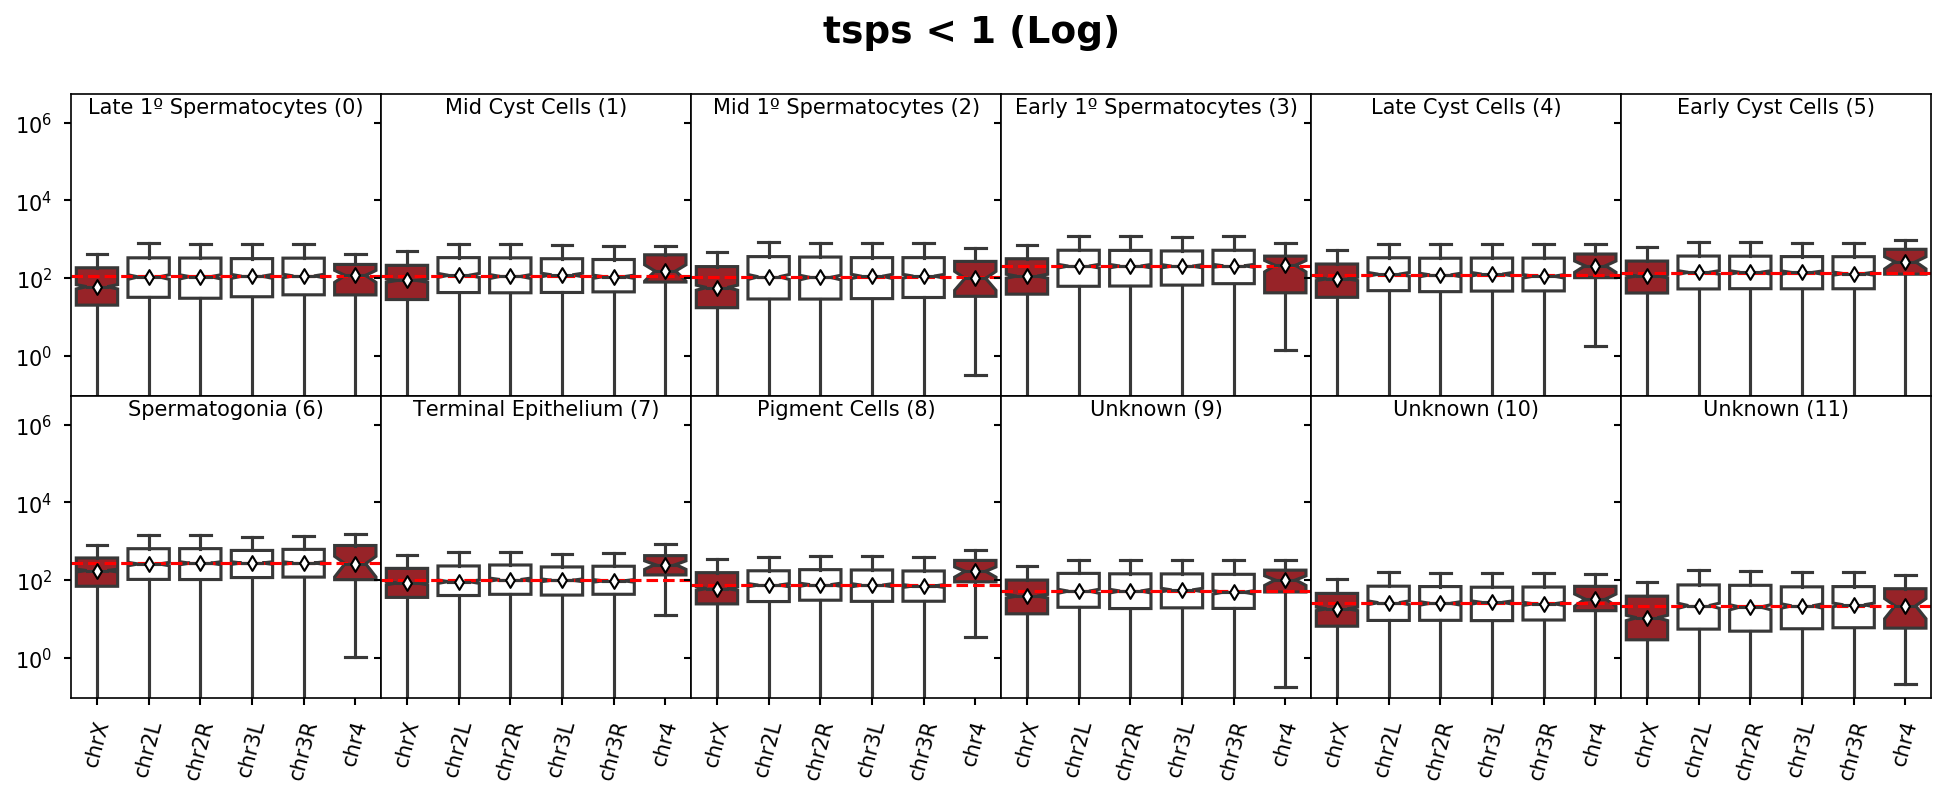

In [37]:
mtsps = pd.read_csv('../output/2018-02-05_tau_modENCODE_tsps.tsv', sep='\t', header=None)
mtsps.columns = ['FBgn', 'tsps']
mtsps.set_index('FBgn', inplace=True)
tsps_genes = mtsps[(mtsps.tsps < 1)].index.tolist()
norm = norm_data(nbconfig.seurat_dir)
tsps_targets = norm.index[norm.index.isin(tsps_genes)].tolist()

print(len(tsps_targets))

fig, axes = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(2, 6, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
_xtoa = []
_pvals = []
_pvalsSample = []
for c, ax, axLog in zip(range(12), axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tsps_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_yscale('log')
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
                        
    # Chrom to A ratios
    _df = x_to_a(c, data=data)
    _df.columns = [c]
    _xtoa.append(_df)
 
    # P-values for Chrom : A comparison
    _pvals.append(mann_whitney_by_arm(c, data=data))
    _pvalsSample.append(mann_whitney_by_arm(c, data=data, sample=True))
                        
for ax in axes[1, :]:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
        
fig.suptitle('tsps < 1')
                        
for axLog in axesLog[1, :]:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)
                        
figLog.suptitle('tsps < 1 (Log)')

df_xtoa = pd.concat(_xtoa, axis=1)
df_pvals = pd.concat(_pvals)
df_pvalsSample = pd.concat(_pvalsSample)

In [38]:
df_xtoa

0         1         2         3         4         5         6   \
chrom                                                                         
chrX   0.545434  0.768721  0.523618  0.550360  0.793268  0.819758  0.651915   
chr2L  0.972884  1.044357  0.988664  0.997621  1.043727  1.016402  0.961340   
chr2R  0.983670  0.978208  0.954624  0.998630  1.001924  1.019430  1.008302   
chr3L  1.010410  1.071815  1.019172  0.992426  1.048213  1.009143  1.018747   
chr3R  1.030476  0.964553  1.027858  1.013715  0.926569  0.945332  1.019635   
chr4   1.066996  1.344540  0.903520  1.046514  1.724921  1.903290  0.977878   

             7         8         9         10        11  
chrom                                                    
chrX   0.852081  0.825242  0.745469  0.713057  0.489870  
chr2L  0.932692  1.013150  1.000000  1.026204  1.007931  
chr2R  1.053795  1.039912  1.006647  0.986743  0.922132  
chr3L  1.009334  1.009755  1.073956  1.043258  0.990684  
chr3R  0.975957  0.961486  0.936788  0.959144  1.055066  
chr4   2.556499  2.296916  1.941284  1.270427  0.991293

In [39]:
df_pvals.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                                  
6        1.695462e-22  0.568829  0.355021
3        1.102638e-24  0.265142  0.506007
2        2.190298e-23  0.278204  0.557472
0        3.154390e-23  0.354216  0.526463

In [40]:
df_pvalsSample.loc[[6, 3, 2, 0], ['chrX', 'chr4', 'chr2L']]

chrX      chr4     chr2L
cluster                                  
6        3.216593e-13  0.143197  0.586026
3        1.155707e-14  0.020831  0.647875
2        5.441832e-14  0.019924  0.677665
0        1.490909e-14  0.039164  0.604613

Text(0.5,0.98,'tsps < 1 (Log)')

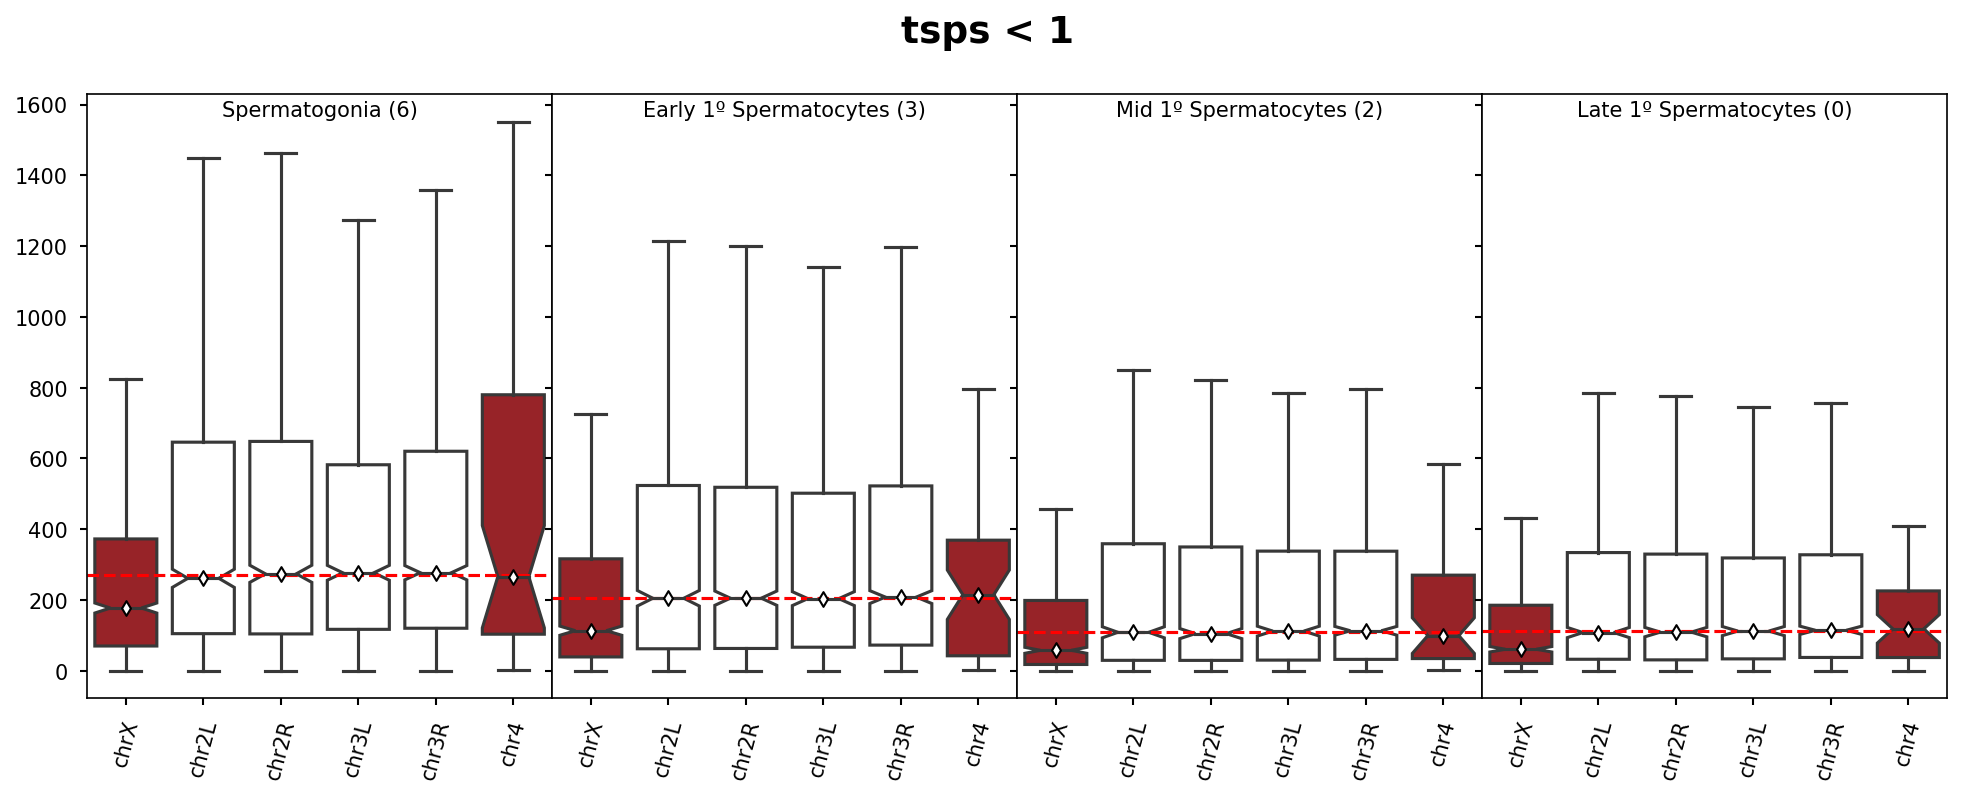

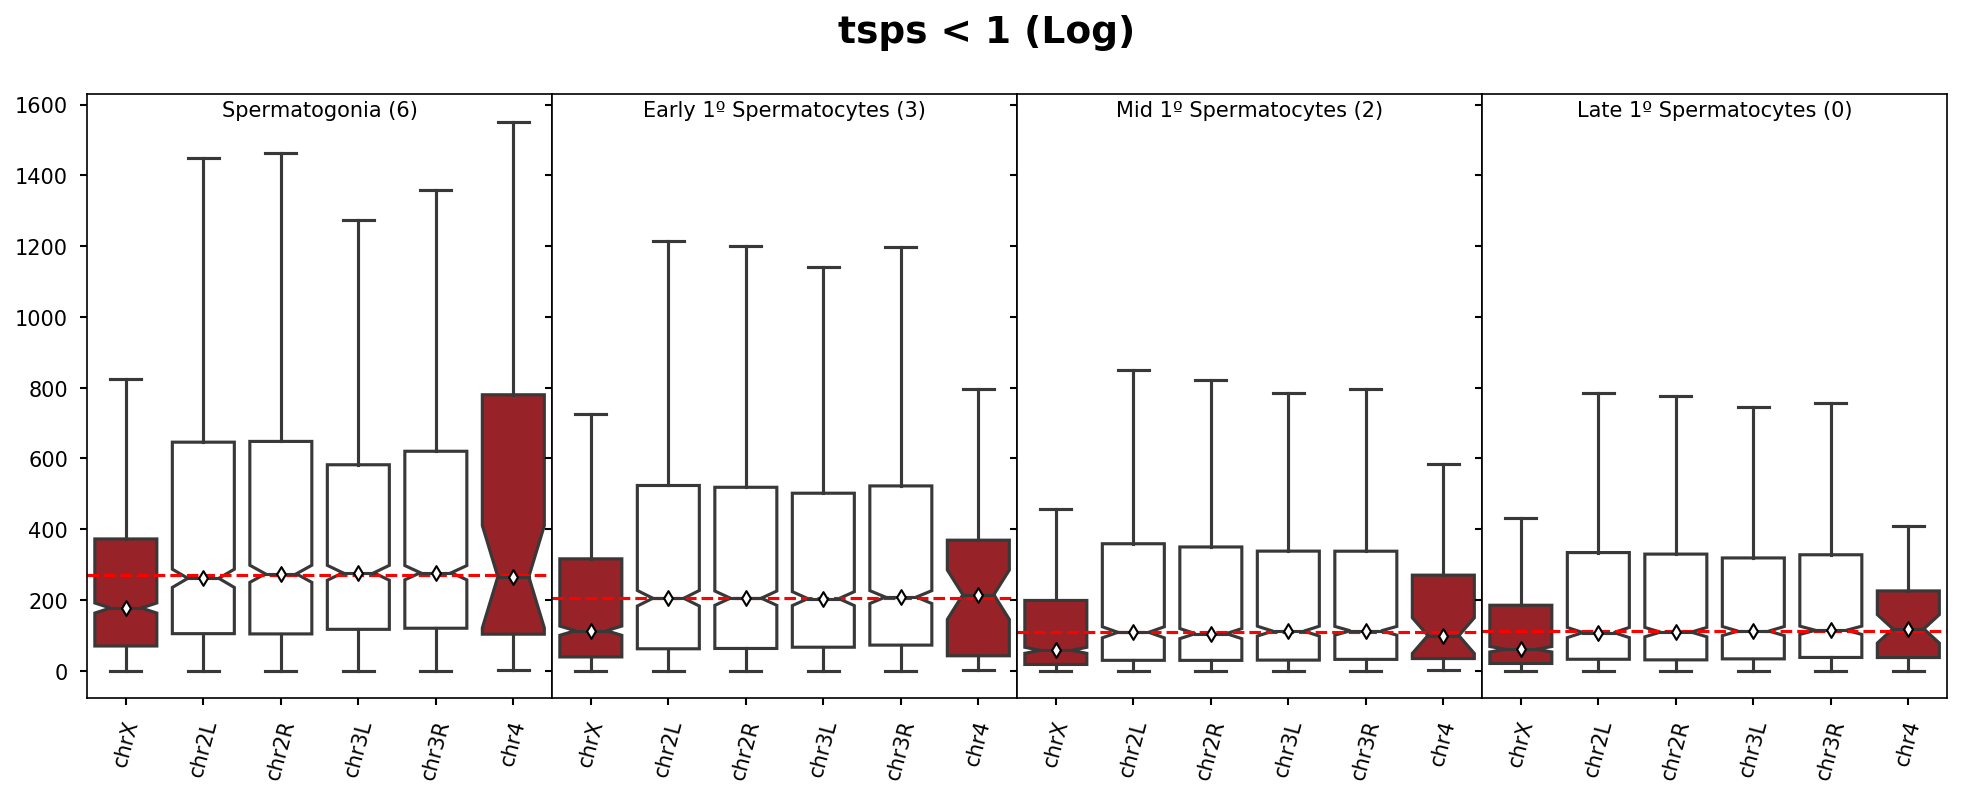

In [41]:
fig, axes = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
figLog, axesLog = plt.subplots(1, 4, figsize=plt.figaspect(1/3), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
for c, ax, axLog in zip([6, 3, 2, 0], axes.flatten(), axesLog.flatten()):
    cnts = agg_all('norm', seurat_dir=nbconfig.seurat_dir, cluster=c)
    data = cnts.to_frame().join(nbconfig.fbgn2chrom).loc[tsps_targets]
                        
    # Regular boxplot
    ax = fe_chrom_boxplot(c, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=ax.transAxes, fontsize=10)
                        
    # Log boxplot
    axLog = fe_chrom_boxplot(c, data=data, ax=axLog)
    axLog.set_xlabel('')
    axLog.set_ylabel('')
    axLog.text(0.5, .99, nbconfig.CLUSTER_ANNOT[c], ha='center', va='top', transform=axLog.transAxes, fontsize=10)
    
for ax in axes:
    for l in ax.get_xticklabels():
        l.set_rotation(75)
                        
fig.suptitle('tsps < 1')

for axLog in axesLog:
    for l in axLog.get_xticklabels():
        l.set_rotation(75)

figLog.suptitle('tsps < 1 (Log)')